# Understanding Causality for Heart Stroke Prediction
Causality.jpg


## Abstract
Causal analysis in machine learning extends beyond traditional correlation-based techniques, offering insights into cause-and-effect relationships. This notebook introduces foundational data preparation techniques for causal analysis, including handling missing data, feature selection, visualization, encoding categorical variables, and modelling . By the end of this notebook, we will understand how these techniques support robust causal inference and model interpretation, laying the groundwork for reliable decision-making in real-world applications.

We demonstrate these principles through a **heart stroke classification** example, using a dataset containing medical and lifestyle attributes such as age, gender, BMI, glucose levels, and smoking status. The target variable, stroke, is binary, indicating whether the individual experienced a stroke or not. By analyzing this dataset causally, we aim to uncover key drivers of stroke risk while ensuring our findings are interpretable and actionable. This real-world example highlights the importance of identifying confounders, mediators, and other causal relationships among features for effective model building.

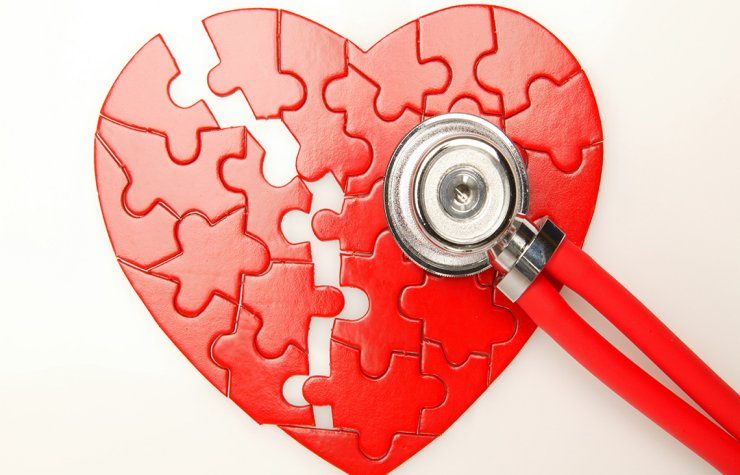

The notebook employs a structured machine learning workflow, starting with handling missing values (e.g., imputing BMI by its median), followed by feature selection using Recursive Feature Elimination (RFE) and outlier treatment with the IQR method. After evaluating various supervised learning models, we leverage SHAP analysis to interpret feature importance. Finally, we use AutoML to identify and train the best-performing model. The resulting pipeline demonstrates how causal analysis can enhance model reliability, guide decision-making, and uncover meaningful insights in healthcare contexts.

---

## 1. Introduction

# The Role of Causality in Machine Learning

In the world of machine learning, understanding causality isn't just a theoretical exercise—it's a practical necessity. While traditional machine learning models excel at identifying patterns and making predictions, they often fall short when it comes to answering the *why*. Causality bridges this gap by helping us uncover the underlying cause-and-effect relationships in data, enabling more informed and impactful decisions.

Causality plays a critical role in machine learning pipelines, allowing us to:
- **Predict the impact of interventions**: For example, "What happens if we increase the marketing budget?" or "How would introducing a new feature affect user engagement?"
- **Identify and address confounding variables**: Ensuring that the insights we derive are meaningful and not the result of hidden biases.
- **Avoid spurious correlations**: Helping us distinguish between real causal relationships and misleading patterns that arise by chance.

Incorporating causality transforms machine learning models from mere prediction tools into engines for actionable insights. It allows organizations to not only anticipate future outcomes but also influence them effectively by identifying the levers that matter.


---

## 2. Theory

### 2.1 Causality Principles
**Definition**:  
Causality focuses on understanding cause-and-effect relationships between variables, going beyond simple associations to determine whether one variable influences another.

##### **Example:**


This image illustrates the relationship between various factors, including weather, ice cream consumption, and sunburns, using the concepts of causality and correlation.

Here's a breakdown:

1. Causality (arrows pointing from Sun to Ice Cream and Sunburn):

   - Dry, hot, and sunny weather causes both the increase in ice cream consumption and sunburn.
   - When the weather is hot, people are more likely to buy and eat ice cream to cool down (causality). Additionally, prolonged exposure to the sun can lead to sunburn, a direct cause of spending time under intense sun.
Correlation (bidirectional arrow between Ice Cream and Sunburn):

There's a correlation between ice cream consumption and sunburn because both increase during hot summer weather. However, they are not directly related in terms of cause and effect. Ice cream consumption does not cause sunburn, nor does sunburn cause ice cream consumption.
This shows that while both phenomena increase together, it’s due to the underlying factor (sunny weather), not a direct cause-and-effect relationship between ice cream and sunburn.


**Explanation of the key concepts in the image:**

 - Causality: Refers to a direct cause-and-effect relationship between two variables (e.g., hot weather directly causing more ice cream sales and sunburns).
 - Correlation: Describes a statistical relationship between two variables, where both increase or decrease together but one does not cause the other (e.g., ice cream sales and sunburn rates, which both increase in sunny weather but are not causally linked).

correlation_causation.png

**Key Concepts**:
- **Correlation vs. Causation**:
  - Correlation: Identifies a statistical relationship between two variables (e.g., both increase or decrease together).
  - Causation: Indicates that changes in one variable directly result in changes in another.
  - Example: Ice cream sales and drowning rates are correlated because both increase in summer, but one does not cause the other. The true driver is the seasonal temperature.

- **Confounders**:
  - Confounders are variables that affect both the predictor (independent variable) and the outcome (dependent variable), leading to a false or exaggerated relationship.
  - Example: Smoking → Lung Cancer. Age could act as a confounder since older individuals may have higher cancer rates regardless of smoking status. Addressing confounders helps isolate true causal effects.

- **Intervention**:
  - Intervention involves actively modifying one variable to measure its causal effect on another.
  - Example: In A/B testing, we show one version of a website to Group A and another version to Group B to determine which version causes higher user engagement

- **Counterfactuals**:
  - Counterfactuals ask, "What would have happened if we had done something differently?"
  - These are used to estimate the causal effect of unobserved scenarios.
Example: If a patient took Treatment A and recovered, counterfactual reasoning helps predict whether they would have recovered without the treatment.

---

### 2.2 Data Preprocessing for Causal Analysis

#### 2.2.1 Handling Missing Data
**Why It Matters**:
Missing data can bias causal estimates if handled improperly.

**Techniques**:
1. **Deletion**:
   - **Listwise Deletion**: Remove rows with missing values.
     - Pros: Simple, ensures complete data.
     - Cons: Can reduce sample size significantly.
   - **Pairwise Deletion**: Use all available data for each pair of variables.
     - Pros: Retains more data.
     - Cons: Can lead to inconsistent results.

2. **Imputation**:
   - **Mean/Median/Mode Imputation**:
     - Replace missing values with the mean/median/mode.
     - Simple but may distort relationships.
   - **K-Nearest Neighbors (KNN) Imputation**:
     - Replace missing values with values from similar observations.
   - **Multiple Imputation**:
     - Generate multiple datasets with different plausible values for missing data and average the results.
   - **Predictive Modeling**:
     - Use regression or machine learning models (e.g., Random Forests) to predict and fill missing values.

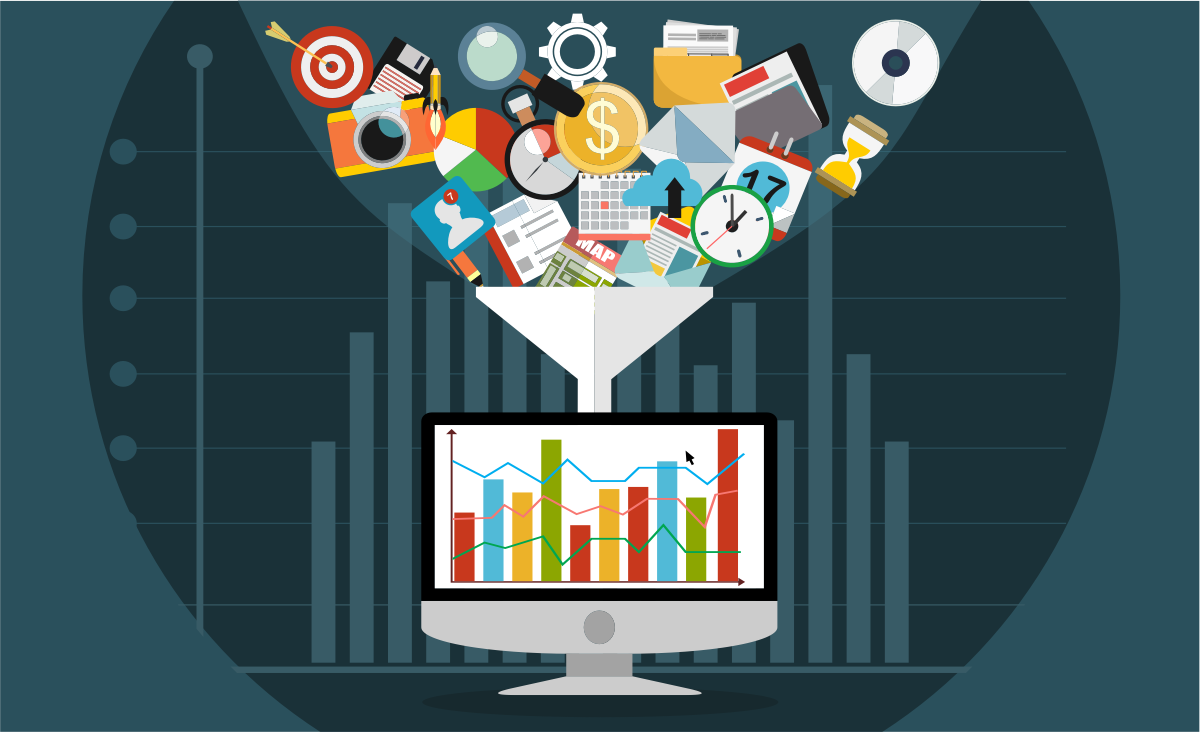

#### 2.2.2 Feature Selection
**Why It Matters**:
Irrelevant or redundant features can introduce noise, inflate model complexity, and obscure causal relationships.

**Techniques**:
1. **Filter Methods**:
   - Statistical measures like correlation, chi-square tests, or mutual information.
   - Example: Removing features with low variance.

2. **Wrapper Methods**:
   - Recursive Feature Elimination (RFE).
   - Forward/Backward selection using a model evaluation metric.

3. **Embedded Methods**:
   - Regularization techniques like LASSO (L1 Regularization).
   - Tree-based feature importance (e.g., feature importance scores from Random Forests or XGBoost).

4. **Domain Knowledge**:
   - Incorporate expert knowledge to prioritize relevant features.

---

#### 2.2.3 Encoding Categorical Variables
**Why It Matters**:
Categorical variables need to be encoded numerically for most machine learning algorithms.

**Techniques**:
1. **Label Encoding**:
   - Assign integer values to categories.
   - Pros: Simple and quick.
   - Cons: Implicit ordinal relationship may mislead models.

2. **One-Hot Encoding**:
   - Create binary columns for each category.
   - Pros: No implicit ordering.
   - Cons: Can lead to high-dimensional data.

3. **Target Encoding**:
   - Replace categories with mean target values (useful for high-cardinality categorical features).
   - Needs regularization to avoid overfitting.

4. **Binary Encoding**:
   - Convert categories to binary digits and assign columns accordingly.
   - Reduces dimensionality while retaining uniqueness.

---

### 2.3 Causal Models

#### **2.3.1 Structural Equation Models (SEMs)**  
Structural Equation Models (SEMs) represent causal relationships using mathematical equations, explicitly capturing how one variable affects another.  

#### **Key Features**  
1. **Equations for Relationships**:  
   SEMs describe dependencies between variables using linear or non-linear equations.  
   - **Example**:  
     \[
     Y = \beta_0 + \beta_1 X + \epsilon
     \]
     - **\( Y \)**: Dependent variable (outcome).  
     - **\( X \)**: Independent variable (cause).  
     - **\( \beta_1 \)**: Coefficient representing the strength of the causal effect of \( X \) on \( Y \).  
     - **\( \epsilon \)**: Error term, capturing unobserved factors.  
   - **Interpretation**: A unit increase in \( X \) causes a change of \( \beta_1 \) in \( Y \).  

2. **Latent Variables**: SEMs can include unobservable factors (e.g., psychological traits) influencing observed variables.  
3. **Model Testing**: SEMs allow hypothesis testing to determine whether a proposed causal structure fits the observed data.  

---

#### **2.3.2 Directed Acyclic Graphs (DAGs)**  
Directed Acyclic Graphs (DAGs) are a graphical representation of causal relationships between variables. Each variable is a node, and directed edges (arrows) show causal influence.  

#### **Key Properties**  
1. **Directed**: Arrows indicate the direction of causality   
2. **Acyclic**: No feedback loops; a variable cannot cause itself  
3. **Confounders**: DAGs can explicitly show confounders that affect multiple variables.  

#### **Example**  
A DAG for healthcare outcomes:  
- Smoking directly causes lung cancer.  
- Genetics is a confounder that influences both smoking behavior and lung cancer risk.  

#### **Use Cases**  
1. Identifying confounding variables.  
2. Designing experiments (e.g., randomized controlled trials).  
3. Ensuring proper variable selection in predictive models.  

---

#### **2.3.3 Causal Inference Algorithms**  
Causal inference algorithms are tools used to estimate causal effects from data, even in non-experimental settings.

#### **1. Do-Calculus (Interventions)**  
- **Developed by**: Judea Pearl.  
- **Purpose**: Formalizes interventions to isolate causal effects.  
- **Example**: Measuring the effect of a drug (\( X \)) on recovery (\( Y \)) by ensuring the drug administration is independent of patient characteristics.  
- **Use Case**: Applied in A/B testing and policy evaluation.

---

#### **2. Propensity Score Matching (PSM)**  
- **Purpose**: Adjust for confounders in observational studies by matching treated and untreated individuals with similar characteristics.  
- **Process**:  
  1. Estimate the propensity score: the probability of receiving treatment given covariates.  
  2. Match treated individuals to untreated ones with similar propensity scores.  
  3. Compare outcomes to estimate the causal effect.  
- **Example**:  
  Comparing recovery rates of patients treated with Drug A vs. no treatment while controlling for age, gender, and baseline health.  

---

#### **3. Inverse Probability Weighting (IPW)**  
- **Purpose**: Reweight the sample to account for confounders, making the treated and untreated groups comparable.  
- **Process**:  
  1. Assign weights based on the inverse of the propensity score for treatment and non-treatment groups.  
  2. Use weighted averages to estimate the causal effect.  
- **Example**:  
  In a study on smoking cessation programs, IPW adjusts for differences in age, education, and health status between participants and non-participants.  

---

#### **Comparison of Techniques**  

| **Algorithm**             | **Use Case**                              | **Strength**                                         | **Limitation**                                      |  
|----------------------------|-------------------------------------------|-----------------------------------------------------|----------------------------------------------------|  
| **SEMs**                  | Testing causal hypotheses                 | Handles latent variables; flexible model structure  | Requires prior knowledge of causal relationships   |  
| **DAGs**                  | Identifying confounders and mediators     | Clear visualization of relationships                | Limited to qualitative analysis; no effect sizes   |  
| **Do-Calculus**           | Simulating interventions                  | Robust framework for experiments                    | Requires well-defined causal assumptions           |  
| **Propensity Score Matching** | Observational studies                   | Reduces confounding bias; interpretable results     | Ineffective for unmeasured confounders             |  
| **Inverse Probability Weighting** | Adjusting for confounders            | Handles confounders efficiently                     | Sensitive to extreme weights and model misspecification |  


## 3. Methods of Investigating Causality

Causality investigation is a crucial aspect of understanding the relationships between variables and identifying cause-and-effect mechanisms. Here are three theoretical approaches to investigate causality:

---

### 1. Randomized Controlled Trials (RCTs)

**Description**:  
RCTs are the most reliable and widely accepted method for establishing causality. They involve randomly assigning participants to treatment and control groups, ensuring that any differences in the outcome can be attributed to the treatment itself rather than confounding variables.

**Key Features**:
- Randomization eliminates bias from confounding factors.
- Provides direct evidence of causal effects.

**Advantages**:
- Ensures internal validity due to randomization.
- Simple to interpret and analyze.

**Limitations**:
- Can be expensive and resource-intensive to conduct.
- Ethical concerns may arise in certain contexts (e.g., withholding treatment).
- May not always be generalizable to broader populations due to controlled environments.

**Example Use Cases**:
- Clinical trials for new drugs or treatments.
- Testing the effectiveness of marketing campaigns.

---

### 2. Causal Inference from Observational Data

**Description**:  
In cases where randomized experiments are infeasible, causal inference techniques are used to analyze observational data and estimate causal relationships. These methods aim to adjust for confounding variables and approximate the results of an RCT.

**Common Techniques**:
- **Propensity Score Matching (PSM)**: Matches treated and untreated samples with similar characteristics to estimate causal effects.
- **Instrumental Variables (IV)**: Utilizes variables that affect the treatment but not the outcome directly to infer causality.
- **Difference-in-Differences (DiD)**: Compares changes in outcomes over time between treated and untreated groups to isolate causal effects.

**Advantages**:
- Applicable to real-world data where experiments are impractical.
- Can uncover causal relationships in historical datasets.

**Limitations**:
- Sensitive to unobserved confounders that may bias results.
- Requires strong assumptions, such as "no hidden confounders" for PSM.

**Example Use Cases**:
- Evaluating the impact of policy changes on economic outcomes.
- Analyzing the effect of education level on income.

---

### 3. Structural Causal Models (SCMs)

**Description**:  
SCMs use directed graphs and mathematical equations to explicitly represent causal relationships between variables. They rely on domain knowledge or causal discovery algorithms to construct and analyze the causal structure.

**Key Features**:
- **Directed Acyclic Graphs (DAGs)**: Visual tools to map causal relationships between variables.
- **Do-Calculus**: A formal framework for answering causal questions about interventions (e.g., "What happens if we change \( X \)?").

**Advantages**:
- Clearly defines causal assumptions and relationships.
- Facilitates counterfactual reasoning and causal effect estimation.

**Limitations**:
- Requires substantial domain expertise to define the causal structure.
- Can become complex when dealing with high-dimensional datasets.

**Example Use Cases**:
- Understanding the relationship between lifestyle factors and health outcomes.
- Designing interventions to optimize business operations or processes.

---


## 4. How AutoML Can Be Helpful in Causality Analysis

AutoML (Automated Machine Learning) automates many aspects of the machine learning pipeline, from data preprocessing to model selection and hyperparameter tuning. While its primary focus is predictive modeling, AutoML can also assist in causality analysis by streamlining certain steps and enhancing efficiency.

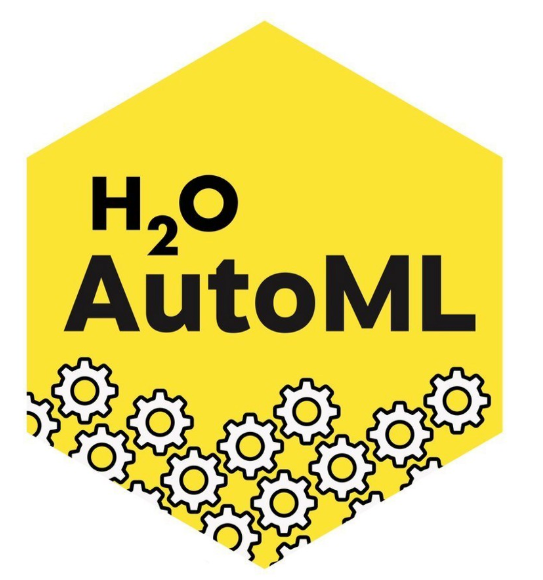

---

#### 4.1 Feature Engineering and Selection for Causal Variables
- **Relevance to Causality**: In causality analysis, identifying relevant variables (e.g., treatment, confounders, and outcomes) is critical. AutoML tools can help automate feature selection by identifying the most predictive and influential variables.
- **How It Helps**:
  - Automates the identification of features strongly associated with the target variable, which can guide causal model construction.
  - Provides insights into potential confounders or mediators.

**Example**:
AutoML can rank features based on their importance, allowing researchers to focus on variables likely to have causal relationships.

---

#### 4.2 Efficient Model Exploration for Causal Effect Estimation
- **Relevance to Causality**: Estimating causal effects often requires fitting multiple models (e.g., propensity score models, treatment effect models). AutoML can automate this process.
- **How It Helps**:
  - Simplifies the task of fitting models such as propensity score estimators, matching algorithms, and counterfactual outcome models.
  - Evaluates models with different assumptions and selects the best-performing ones for causal inference.

**Example**:
AutoML frameworks can be adapted to test multiple causal models (e.g., logistic regression, gradient boosting) and recommend the most reliable one.

---

#### 4.3 Handling High-Dimensional Data
- **Relevance to Causality**: High-dimensional datasets (e.g., genomic or customer behavior data) can complicate causal analysis due to the large number of variables.
- **How It Helps**:
  - Automates dimensionality reduction (e.g., through PCA or feature elimination) to focus on the most important variables for causal relationships.
  - Handles feature interactions that might be critical in identifying causal pathways.

**Example**:
AutoML can reduce the computational burden by automatically filtering irrelevant variables and focusing on causal candidates.

---

#### 4.5 Democratizing Causal Analysis
- **Relevance to Causality**: Causal inference traditionally requires domain expertise and statistical knowledge, which can limit accessibility.
- **How It Helps**:
  - Makes causal analysis more accessible to non-experts by automating complex tasks, such as model tuning and diagnostics.
  - Reduces the time and expertise required to implement robust causal models.

**Example**:
With AutoML, practitioners can focus on defining causal assumptions (e.g., constructing a Directed Acyclic Graph) while the tool handles technical details.

---

#### Limitations of AutoML in Causal Analysis
While AutoML provides significant advantages, it has limitations in causality:
1. **Lack of Domain Knowledge**: AutoML cannot incorporate expert knowledge of causal relationships (e.g., defining the DAG or selecting valid instruments).
2. **Assumption Sensitivity**: AutoML focuses on predictive accuracy, which does not always align with causal validity.
3. **Limited Causal-Specific Features**: Most AutoML tools are not explicitly designed for causal inference and may overlook critical causal assumptions.

---

#### Future Directions
To fully integrate causality into AutoML, future advancements could include:
1. **Causal-Aware AutoML Frameworks**: Tools designed specifically for causal inference tasks, combining automation with causal principles.
2. **Integration of DAGs**: AutoML systems could allow users to define causal assumptions via DAGs, automating the downstream analysis.
3. **Counterfactual Analysis**: AutoML could extend to automating counterfactual reasoning and estimating "what-if" scenarios.

---


## 5. Practical Implementation

### 5.1 Python Libraries for Causal Analysis
- **Pandas**: Data manipulation (handling missing data, encoding features).
- **CausalInference**: Implements matching and weighting methods.
- **Dowhy**: Provides a complete framework for causal inference.
- **EconML**: Supports econometric and machine learning models for causal analysis.
- **NetworkX**: Create and analyze DAGs.
- **scikit-learn**: Feature selection and preprocessing techniques.

# Crash Course in Causality: Heart Stroke Prediction



Stroke Prediction -
Stroke is a severe medical condition caused by a disruption in blood supply to the brain, resulting from either a blockage or the rupture of a blood vessel. Prompt medical attention is crucial in such cases. Numerous factors contribute to an increased risk of stroke, making it essential to explore the relationships between these factors and the occurrence of stroke. Analyzing a dataset containing information such as age, gender, hypertension, heart disease, average glucose level, smoking status, and BMI enables the training of machine learning models. These models can identify patterns and make predictions about an individual's likelihood of experiencing a stroke. Integrating such predictive models into healthcare systems allows medical professionals to proactively identify individuals at higher risk of stroke, enabling preventive measures and better management of the condition. This approach has the potential to save lives and enhance patient outcomes.

Goal here is to classify whether a person has a stroke or not. That is, it is a classification problem.

The information about dataset:

- id: unique identifier

- gender: "Male", "Female" or "Other"

- age: age of the patient

- hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

- heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

- ever_married: "No" or "Yes"

- work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

- Residence_type: "Rural" or "Urban"

- avg_glucose_level: average glucose level in blood

- bmi: body mass index

- smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

- stroke: 1 if the patient had a stroke or 0 if not

Models used -
- Logistic Regression
- XGBoost
- AutoML

SHAP Analysis -

SHAP (SHapley Additive exPlanations) analysis is a method used to explain the output of machine learning models. It provides insights into how the input features contribute to the model's predictions.

SHAP values provide a clear interpretation of feature importance by quantifying the impact of each feature on the model's output. This helps to understand which features are driving the model's predictions and how they influence them.

## Installing Libraries

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future
!pip install h2o
!pip install shap
!pip install dowhy
!pip install causalml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.8/265.8 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.6-py2.py3-none-any.whl size=265859786 sha256=8a3cf38b3b980f9445f935efc3db29fb4322d0755c5ddb924ff0a5ee08f4dc55
  Stored in directory: /root/.cache/pip/wheels/0c/95/eb/b449c73f478dbc4557b80170cf7f2aa6db15862877e9a63536
Successfully built h2o
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.4/398.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.11
    Uninstalling Cython-3.0.11:
      Successfully uninstalled Cython-3.0.11
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## Importing Libraries

In [2]:
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch
import random, os, sys
from datetime import datetime
import logging
import csv
import time
import psutil
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import shap
import dowhy
import networkx as nx


## Reading the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/pranitee23/Data-Science-Methods-and-Tools/main/healthcare-dataset-stroke-data.csv')
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [4]:
# checking null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- This dataset has 5 categorical columns and 7 numerical columns.
- Here, the target variable is "stroke" and all other are the independent variables. Therefore, "bmi" is one of the independent variables that has 201 null values.

In [5]:
df.describe()

id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000    33.100000     0.000000  
max           271.740000    97.600000     1.000000

- In the age column, the range is 0.08 to 82 and the mean age being 43.22. Here the min age can be a data entry issue or can be related to infants. The range of all the other variables make sense.
- For example -
- Gender ranges from 0 to 2, that is male, female, and other
Ever Married ranges from 0 to 1, that is yes or no. Same goes with hypertension, heart disease, and stroke.
- Smoking Status ranges from 0 to 3. These include formerly smoked, never smoked, smokes and unknown.
- Residence type ranges from 0 to 1 that is rural  or urban.
Work Type ranges from 0 to 4. These include Private, self employed, Govt job, Children, and never worked.

In [ ]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


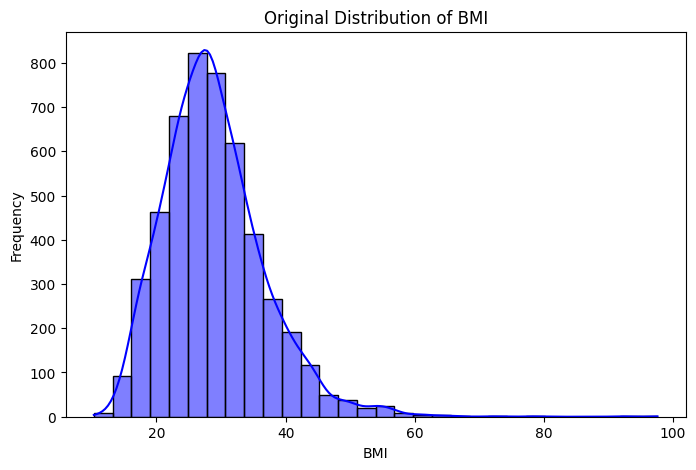

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, bins=30, color='blue')
# taking the bmi column since it has null values to see its destributions
plt.title('Original Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

BMI column has 201 null values. The graph above tells that the bmi has right-skewed distribution. Therefore using median to impute the missing values later.

## Preprocessing - Dropping ID and imputing null values from bmi with median

In [6]:
# dropping the id column
df.drop('id' , axis = 1 , inplace = True)

#filling the null values by median
df.bmi.fillna(df.bmi.median(),inplace=True)
df.isnull().sum()

<ipython-input-6-577ec73888c8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bmi.fillna(df.bmi.median(),inplace=True)


gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

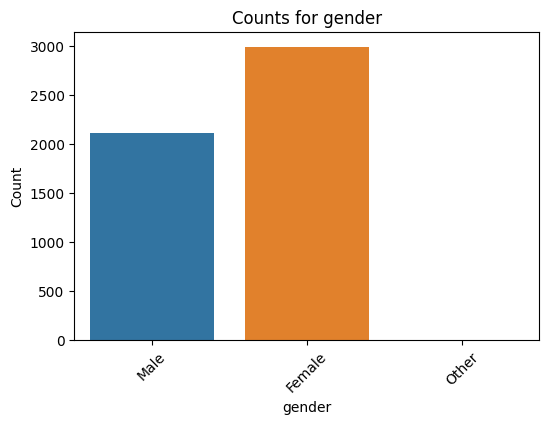

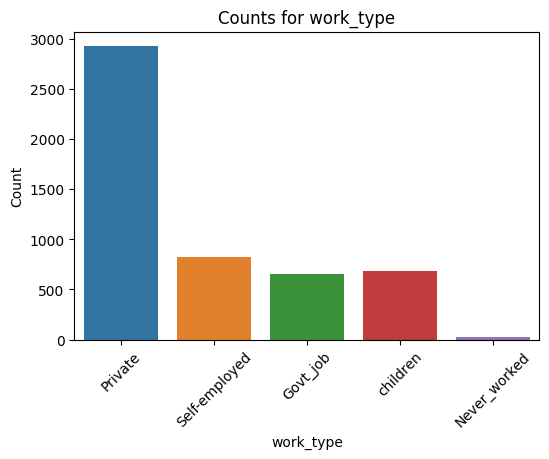

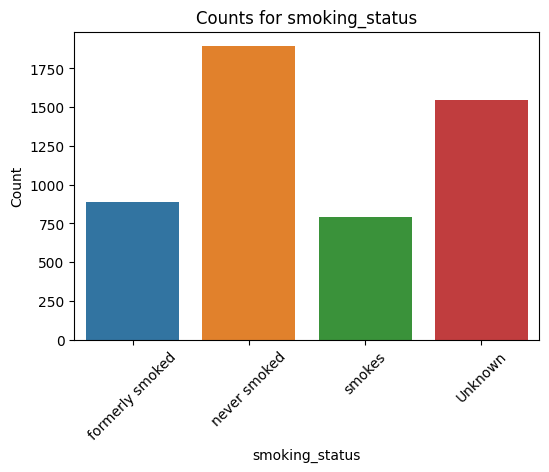

In [7]:
# List of categorical columns
categorical_columns = ['gender', 'work_type', 'Residence_type', 'smoking_status']

# Loop through each categorical column
for column in categorical_columns:
    # Create a new figure for each column
    plt.figure(figsize=(6, 4))

    # Plot the count for the current column
    sns.countplot(x=df[column], hue= df[column])

    # Set labels and title
    plt.title(f"Counts for {column}")
    plt.ylabel("Count")
    plt.xlabel(column)
    plt.xticks(rotation=45)

    # Show the plot
    plt.show()

From these graphs we see the distributions of various unique values of each features that are present

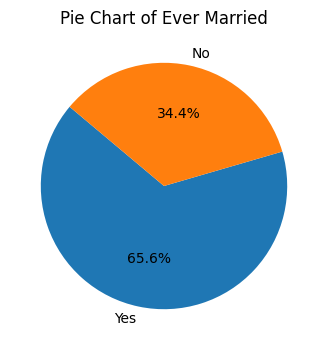

In [ ]:
ever_married_counts = df['ever_married'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(ever_married_counts, labels=ever_married_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Ever Married')
plt.show()

From this graph, it is seen that 65.6% of the individuals are married and 34.4% are not.

In [ ]:
plt.scatter(df['bmi'], df['age'], alpha=0.5)
plt.title('Scatter plot of bmi vs age')
plt.xlabel('bmi')
plt.ylabel('age')
plt.show()

- Density of Data Points: There's a high density of points along the lower BMI values, which suggests that a large number of individuals in the dataset have BMI values in the lower range.

- Age Distribution: The ages are fairly uniformly distributed across the BMI range, with  a slight concentration of younger individuals at lower BMI values.

- Outliers: There appear to be some outliers, especially in terms of BMI, with a few points having significantly higher BMI values compared to the rest of the data.

- Potential Relationship: The plot doesn't suggest a clear or strong relationship between age and BMI; the points are quite spread out across ages for any given BMI. This could indicate that within this dataset, BMI does not change significantly with age, or that any relationship is not linear and might require more complex modeling to understand.

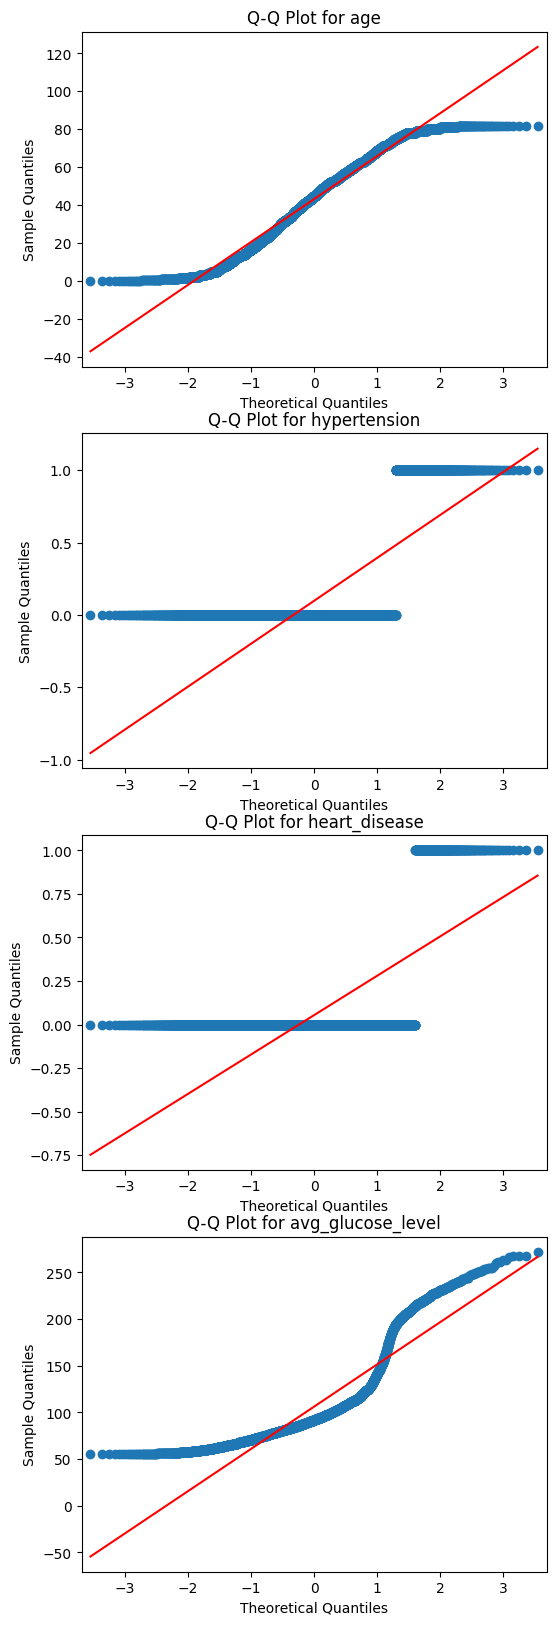

In [ ]:
numeric_columns_list = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level'] # creating a list

fig, axes = plt.subplots(nrows=len(numeric_columns_list), figsize=(6, 5 * len(numeric_columns_list)))

# Plot Q-Q plots for each numeric variable
for i, variable in enumerate(numeric_columns_list):
    sm.qqplot(df[variable], line='s', ax=axes[i])
    axes[i].set_title(f'Q-Q Plot for {variable}')

plt.show()

qq plot is drawn for all the numeric columns:
- For age column, some of the datapoints align with the therotical values. All the values in age are continuous in nature
- For hypertension, heart disease, and stroke, values are binomial. It is either yes/no or 1/0.
- For bmi column there are values in the middle quartile which obey the theoritical values, and other values deviate from the standard line. This shows that there are more extreme values (both low and high) than what would be expected in a normal distribution
- For avg_glucose_level there are values which deviate from the straight line, showing that there are extreme values than what would be expected in a normal distribution.

## Label Encoding

In [8]:
le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

'''
Gender - Female(0), Male(1)
work_type - Private(2), self_employed(3), children(4), Govt_job(0), never_worked(1)
Residence_type - Urban(1), Rural(0)
smoking_status - never smoked(2), unknown(0), formerly smoked(1), smokes(3)
ever_married - Yes(1), No(0)
'''

'\nGender - Female(0), Male(1)\nwork_type - Private(2), self_employed(3), children(4), Govt_job(0), never_worked(1)\nResidence_type - Urban(1), Rural(0)\nsmoking_status - never smoked(2), unknown(0), formerly smoked(1), smokes(3)\never_married - Yes(1), No(0)\n'

## Causality - DAG

In [9]:
# Define a simple causal graph
causal_graph = nx.DiGraph()

# Add causal relationships
causal_graph.add_edges_from([
    ('age', 'stroke'),
    ('hypertension', 'stroke'),
    ('heart_disease', 'stroke'),
    ('bmi', 'stroke'),
    ('avg_glucose_lvl', 'stroke'),
    ('smoking_status', 'stroke')
])

In [10]:
# Set a random seed for consistent graph layout
plt.figure(figsize=(9,9))
nx.draw(causal_graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', pos=nx.spring_layout(causal_graph, seed=42))
plt.title('Causal Graph for Stroke')
plt.show()

## Causal Graph for Stroke

The following graph represents a causal structure where different variables are hypothesized to influence the likelihood of a stroke event. The nodes in the graph represent variables or features in the dataset, and the directed edges (arrows) indicate the assumed causal relationships between them.

### Explanation of the Variables:
1. **Age**: Age is an important factor in the likelihood of having a stroke. As people get older, their risk of stroke increases, hence the directed edge from `age` to `stroke`.
   
2. **Hypertension**: High blood pressure (hypertension) is a well-known risk factor for stroke. The graph shows the direct causal relationship between hypertension and stroke.

3. **Heart Disease**: Heart disease is another significant risk factor for stroke. People with heart disease are at a higher risk of stroke, and this relationship is depicted in the graph.

4. **BMI (Body Mass Index)**: A high BMI is often associated with various health conditions, including stroke. The arrow from `bmi` to `stroke` reflects this relationship.

5. **Average Glucose Level**: Elevated blood glucose levels (often related to diabetes) increase the risk of stroke. The arrow from `avg_glucose_level` to `stroke` reflects this risk.

6. **Smoking Status**: Smoking is a well-established risk factor for stroke. The causal relationship between smoking and stroke is shown by the arrow from `smoking_status` to `stroke`.

7. **Stroke**: The central node represents whether or not a stroke occurred, which is the target variable in this dataset.

### Causal Graph Interpretation:

- **Direct Causal Effects**: The graph shows direct causal paths from variables like `age`, `hypertension`, `heart_disease`, `bmi`, `avg_glucose_level`, and `smoking_status` to `stroke`. This indicates that each of these factors contributes independently to the risk of stroke.
  
- **No Cycles**: The graph is a Directed Acyclic Graph (DAG), meaning there are no cycles or feedback loops, which ensures that the causal relationships are straightforward and not influenced by any cyclical effects.

### Importance of Causal Graphs:
Causal graphs are crucial in understanding the relationships between different variables in a dataset. They help identify potential confounders, mediators, and direct effects, which is essential for accurate modeling and prediction. By using causal graphs, we can make more informed decisions in feature engineering, model interpretation, and ultimately in understanding the causes of events like strokes.

This causal graph helps visualize the relationships between different health variables and stroke. It can serve as a foundation for further analysis, helping to guide feature selection and understanding how various factors influence stroke risk.


### Histograms

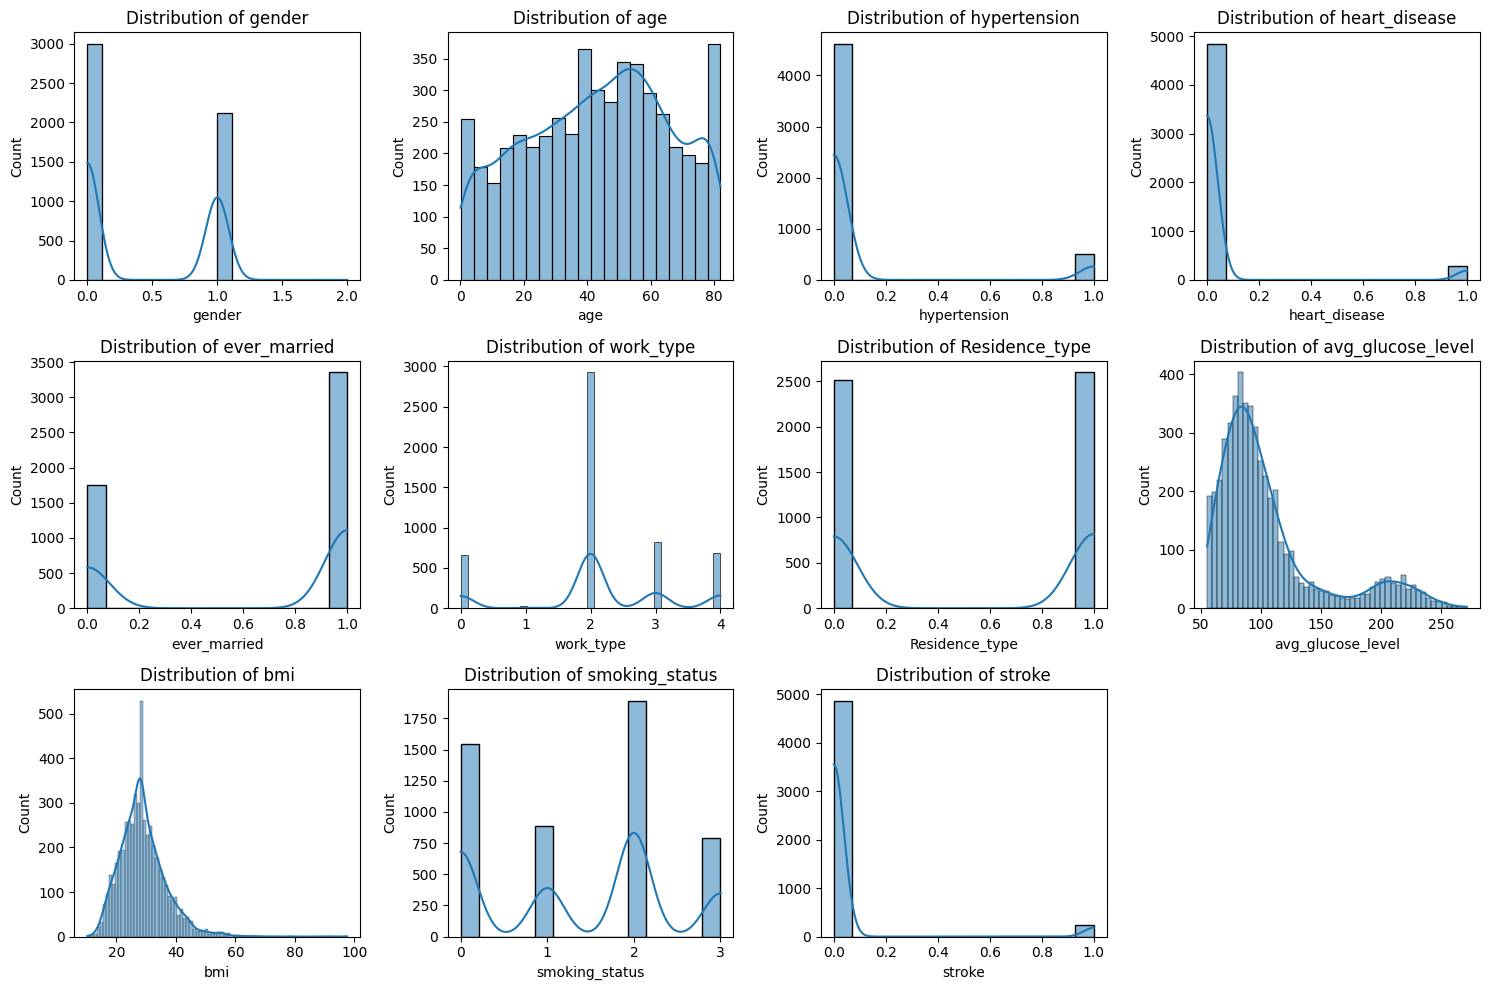

In [ ]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

- Distribution of Gender:
This histogram shows the frequency of each gender category in the dataset. The x-axis represents gender categories, which are probably encoded as numerical values, and the y-axis represents the count of observations in each category.

- Distribution of Age:
This plot shows the age distribution of individuals in the dataset. The x-axis is the age in years, and the y-axis is the count of individuals. It looks like a unimodal distribution, with the majority of individuals in the middle age range.

- Distribution of Average Glucose Level:
The last plot shows the distribution of average glucose levels among individuals. The x-axis is the average glucose level, and the y-axis is the count of individuals. It appears to have a right-skewed distribution, with most individuals having glucose levels in the lower range and fewer individuals having very high glucose levels.

- Distribution of Heart Disease:
Similar to the hypertension histogram, this one shows the count of individuals with and without heart disease, which is another binary feature.

- Distribution of Ever Married:
This histogram shows the marital status of individuals, with categories likely encoded as 0 for 'No' and 1 for 'Yes', indicating whether individuals have ever been married.

## Heatmaps to show the correlation between the dependent and independent variable

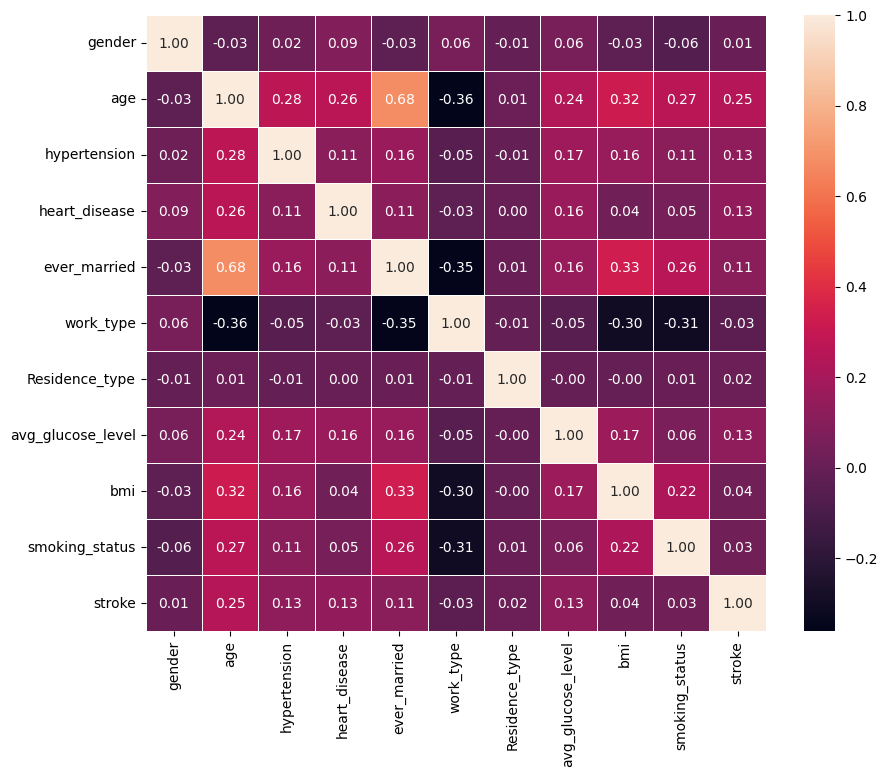

In [11]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,linewidths=.5,fmt='.2f')
plt.show()

From the predictor variables, according to the heatmap, age and ever_married have a positive correlation of 0.68 value.

In [12]:
X2 = df[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status',
          'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']]
y2 = df['stroke']

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model
rf_classifier.fit(X2, y2)

# Get feature importances
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X2.columns).sort_values(ascending=True)
plt.figure(figsize=(8, 6))
colors = sns.color_palette("vlag", len(feature_importances))
feature_importances.plot(kind='barh', color=colors)
plt.title('Feature Importances from Random Forest Classifier')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.show()

From the graph above graph, we can see that avg_glucose_level is the most important feature followed by bmi and age

In [13]:
# Define a simple causal graph
causal_graph = nx.DiGraph()

# Add causal relationships
causal_graph.add_edges_from([
    ('age', 'stroke'),
    ('bmi', 'stroke'),
    ('avg_glucose_lvl', 'stroke'),
    ('smoking_status', 'stroke')
])

In [16]:
plt.figure(figsize=(7,6))
nx.draw(causal_graph, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', pos=nx.spring_layout(causal_graph, seed=42))
plt.title('Causal Graph for Stroke')
plt.show()

## Causal Graph for Stroke

The following graph represents a causal structure after feature selection. Only features with highest scores have been taken for visualization.

### Explanation of the Variables:
1. **Age**: Age is an important factor in the likelihood of having a stroke. As people get older, their risk of stroke increases, hence the directed edge from `age` to `stroke`.

2. **BMI (Body Mass Index)**: A high BMI is often associated with various health conditions, including stroke. The arrow from `bmi` to `stroke` reflects this relationship.

3. **Average Glucose Level**: Elevated blood glucose levels (often related to diabetes) increase the risk of stroke. The arrow from `avg_glucose_level` to `stroke` reflects this risk.

4. **Smoking Status**: Smoking is a well-established risk factor for stroke. The causal relationship between smoking and stroke is shown by the arrow from `smoking_status` to `stroke`.

5. **Stroke**: The central node represents whether or not a stroke occurred, which is the target variable in this dataset.

### Causal Graph Interpretation:

- **Direct Causal Effects**: The graph shows direct causal paths from variables like `age`, `hypertension`, `heart_disease`, `bmi`, `avg_glucose_level`, and `smoking_status` to `stroke`. This indicates that each of these factors contributes independently to the risk of stroke.
  
- **No Cycles**: The graph is a Directed Acyclic Graph (DAG), meaning there are no cycles or feedback loops, which ensures that the causal relationships are straightforward and not influenced by any cyclical effects.

## Handling Outliers

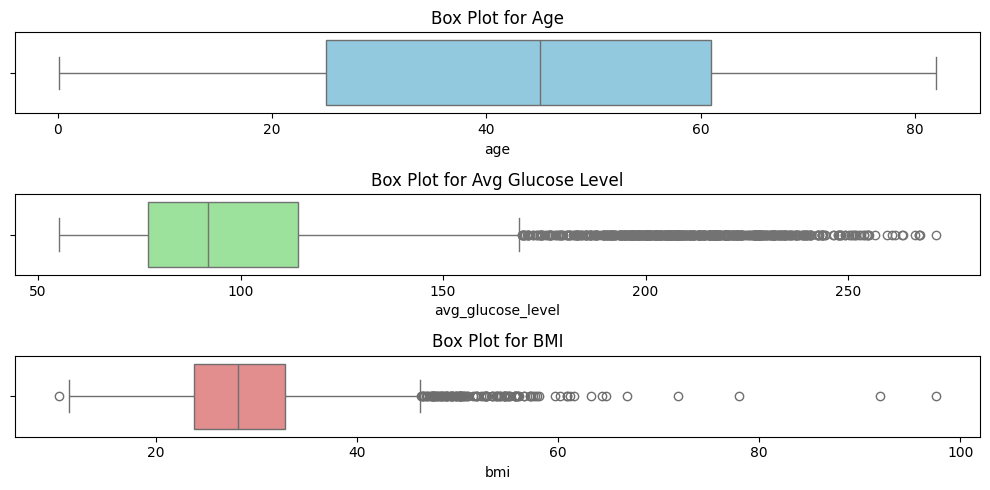

In [ ]:
# Box plot
plt.figure(figsize=(10, 5))

# Box plot for 'age'
plt.subplot(3, 1, 1)
sns.boxplot(x=df['age'], color='skyblue')
plt.title('Box Plot for Age')

# Box plot for 'avg_glucose_level'
plt.subplot(3, 1, 2)
sns.boxplot(x=df['avg_glucose_level'], color='lightgreen')
plt.title('Box Plot for Avg Glucose Level')

# Box plot for 'bmi'
plt.subplot(3, 1, 3)
sns.boxplot(x=df['bmi'], color='lightcoral')
plt.title('Box Plot for BMI')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
# Identifying outliers using IQR method for 'avg_glucose_level'
Q1_glucose = df['avg_glucose_level'].quantile(0.25)
Q3_glucose = df['avg_glucose_level'].quantile(0.75)
IQR_glucose = Q3_glucose - Q1_glucose
lower_bound_glucose = Q1_glucose - 1.5 * IQR_glucose
upper_bound_glucose = Q3_glucose + 1.5 * IQR_glucose

# Finding outliers in 'avg_glucose_level'
outliers_glucose = df[(df['avg_glucose_level'] < lower_bound_glucose) | (df['avg_glucose_level'] > upper_bound_glucose)]

# Removing 'bmi' outliers
stroke_data_no_outliers_glucose = df.drop(outliers_glucose.index)

# Store the lower bound, upper bound, and number of outliers removed for 'avg_glucose_level'
threshold_comparison_glucose = pd.DataFrame({
    'Column': ['avg_glucose_level'],
    'Lower Bound': [lower_bound_glucose],
    'Upper Bound': [upper_bound_glucose],
    'Outliers Removed': [len(outliers_glucose)]
})
print(threshold_comparison_glucose)

              Column  Lower Bound  Upper Bound  Outliers Removed
0  avg_glucose_level      21.9775     169.3575               627


In [ ]:
X_outlier_glucose = stroke_data_no_outliers_glucose.drop('stroke', axis=1)
y_outlier_glucose = stroke_data_no_outliers_glucose['stroke']

### Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_outlier_glucose, y_outlier_glucose, test_size=0.3, random_state=42,shuffle=True)

In [ ]:
X_train.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
3546       0   7.0             0              0             0          4   
4791       0  64.0             0              0             1          2   
260        1  79.0             0              1             1          2   
4299       0  66.0             0              0             1          3   
448        1  65.0             0              0             1          2   

      Residence_type  avg_glucose_level   bmi  smoking_status  
3546               1              98.22  34.0               0  
4791               1              65.63  33.5               3  
260                1              57.08  22.0               1  
4299               0              85.90  34.6               2  
448                1             145.15  28.9               0

## Logistic Regression Model

In [ ]:
logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred_logreg = logreg_model.predict(X_test)

# Accuracy
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f"Logistic Regression Accuracy: {accuracy_logreg:.4f}")

Logistic Regression Accuracy: 0.9621


### Interpreting Regression Coefficients

In [ ]:
coefficients = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': logreg_model.coef_[0]})
print(coefficients)

            Variable  Coefficient
0             gender     0.275668
1                age     0.077237
2       hypertension     0.332948
3      heart_disease    -0.070628
4       ever_married    -0.451998
5          work_type    -0.076465
6     Residence_type     0.077105
7  avg_glucose_level     0.000188
8                bmi    -0.024547
9     smoking_status    -0.125117


- Gender: The coefficient for gender is positive (0.268469), indicating that males (encoded as 1) have a higher log-odds of having a stroke compared to females (encoded as 0), holding other variables constant.

- Age: The positive coefficient (0.077120) for age suggests that as age increases, the log-odds of having a stroke increase, which is consistent with medical knowledge that stroke risk typically increases with age.

- Ever Married: The negative coefficient (-0.446171) for being ever married (encoded as 1) suggests that married individuals have lower log-odds of having a stroke compared to those who have never been married (encoded as 0). This might reflect the possible health benefits of marriage, such as social support.

- Work Type: The negative coefficient for work type (-0.076684) suggests that with an increase in the encoded value for work type, the log-odds of having a stroke decrease. Given your encoding, individuals who have 'never worked' (encoded as 1) have a lower risk compared to those with 'private' jobs (encoded as 2), and so on.

- Smoking Status: The negative coefficient (-0.122931) implies that as the encoded value for smoking status increases, the log-odds of having a stroke decrease. With your encoding, 'smokes' (encoded as 3) would be associated with a lower log-odds compared to 'formerly smoked' (encoded as 1), which might suggest that current smokers have a lower risk than former smokers, but such a conclusion could be misleading without further context and understanding of the data.

- BMI: The negative coefficient (-0.024623) for BMI suggests that a higher BMI is associated with lower log-odds of having a stroke, which is contrary to common health perspectives where high BMI is a risk factor for stroke.

- Residence Type: The coefficient (0.070040) for residence type is positive, which indicates that individuals living in urban areas (encoded as 1) have higher log-odds of having a stroke compared to those living in rural areas (encoded as 0)

### Confusion Matrix - Logistic Regression

In [ ]:
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
sns.heatmap(cm_logreg, annot=True, fmt="d")
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report - Logistice Regression

In [ ]:
# Classification Report Logistic Regression
classification_rep_logreg = classification_report(y_test, y_pred_logreg, zero_division=1)

# Print the classification report
print("Classification Report for Logistic Regression:")
print(classification_rep_logreg)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1294
           1       1.00      0.00      0.00        51

    accuracy                           0.96      1345
   macro avg       0.98      0.50      0.49      1345
weighted avg       0.96      0.96      0.94      1345



## SHAP Analysis on Logistic Regression Model

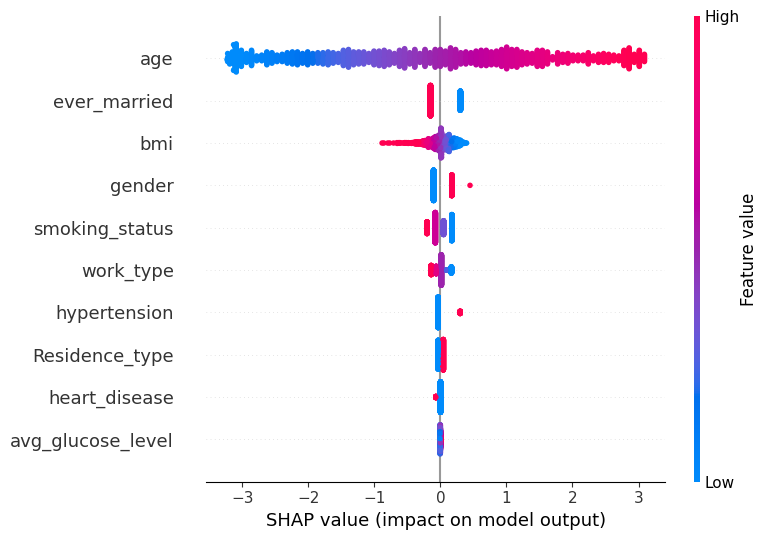

In [ ]:
explainer = shap.LinearExplainer(logreg_model, X_test)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

- Age is the most impactful feature, with higher values pushing predictions towards higher likelihoods of stroke.
- Being ever married (presumably being married is the high feature value indicated by red) seems to lower the likelihood of stroke, which is represented by the points mainly being on the left (blue).
- Higher BMI values (in red) seem to have a mix of positive and negative impacts on the stroke prediction, with a spread across both sides of zero.
- Gender (with male as 1) has a noticeable impact, with being male (in red) contributing to a higher prediction of stroke.
- Smoking status, work type, hypertension, residence type, heart disease, and average glucose level also contribute to the model's output, but their impact is less pronounced compared to age, marital status, and BMI.

In [ ]:
explainer = shap.Explainer(logreg_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

- Age has the largest average impact on the model's output, which means that changes in age are, on average, the most influential in affecting the model's predictions.
- The features following age in descending order of impact are ever married, BMI, gender, smoking status, work type, hypertension, and residence type.
- Heart disease and average glucose level have the least average impact on the model's output.

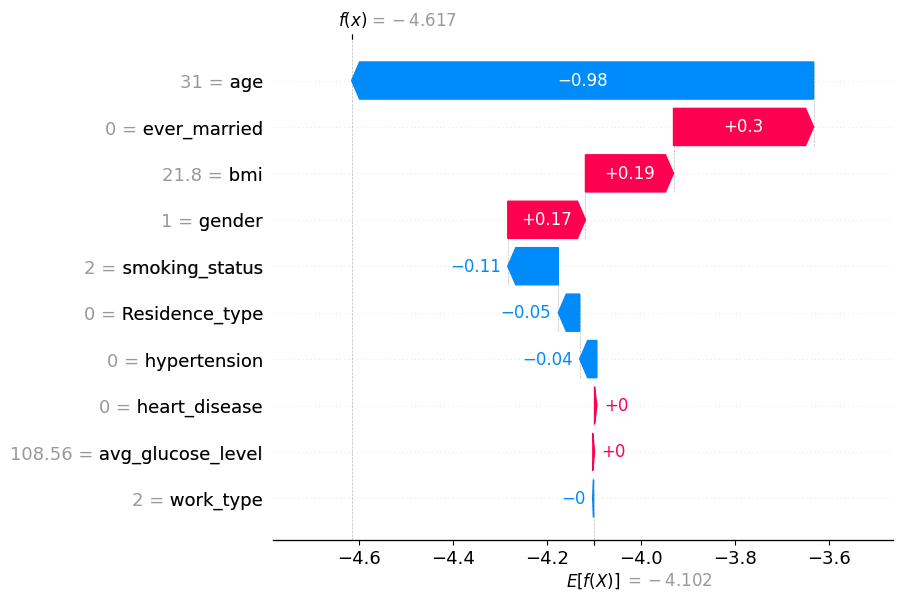

In [ ]:
explainer = shap.Explainer(logreg_model, X_train)
sample_ind = 20
# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

Each bar represents the impact of an individual feature on the model's prediction for this particular instance, relative to the base value.
Red bars represent features that push the prediction higher (increase the probability of the positive class), while blue bars push the prediction lower (decrease the probability of the positive class).

- The feature "age" appears to have a large negative impact on the model's prediction, strongly decreasing the likelihood of the positive class.
- Features like "ever_married" and "work_type" have negative contributions as well, further reducing the prediction value.
- "smoking_status" and "Residence_type" have a small positive impact, increasing the prediction value slightly.
- Many features have a contribution of zero or a negligible impact in this particular instance, as indicated by short bars or a lack of bars for those features.

## XGBOOST Model(Tree Based)

In [ ]:
# Create an XGBoost classifier
xgb_model = xgb.XGBClassifier(objective='binary:logistic', max_depth=4, learning_rate=0.1, n_estimators=100, seed=42)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.96


### Confusion Matrix - XGBoost

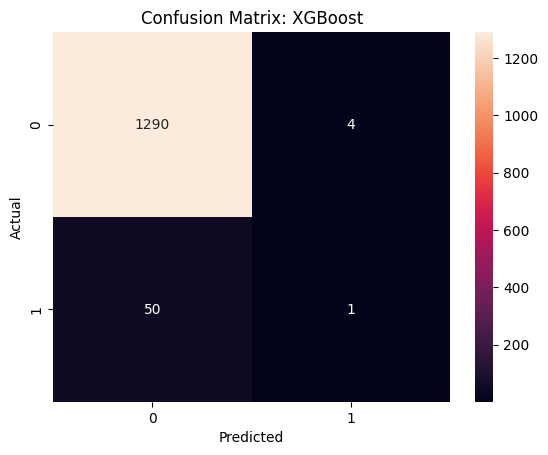

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred)
sns.heatmap(cm_xgb, annot=True, fmt="d")
plt.title("Confusion Matrix: XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Classification Report

In [ ]:
# Classification Report Logistic Regression
classification_rep_xgb = classification_report(y_test, y_pred, zero_division=1)

# Print the classification report
print("Classification Report for XGBoost:")
print(classification_rep_xgb)

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1294
           1       0.20      0.02      0.04        51

    accuracy                           0.96      1345
   macro avg       0.58      0.51      0.51      1345
weighted avg       0.93      0.96      0.94      1345



### SHAP Analysis on XGBoost

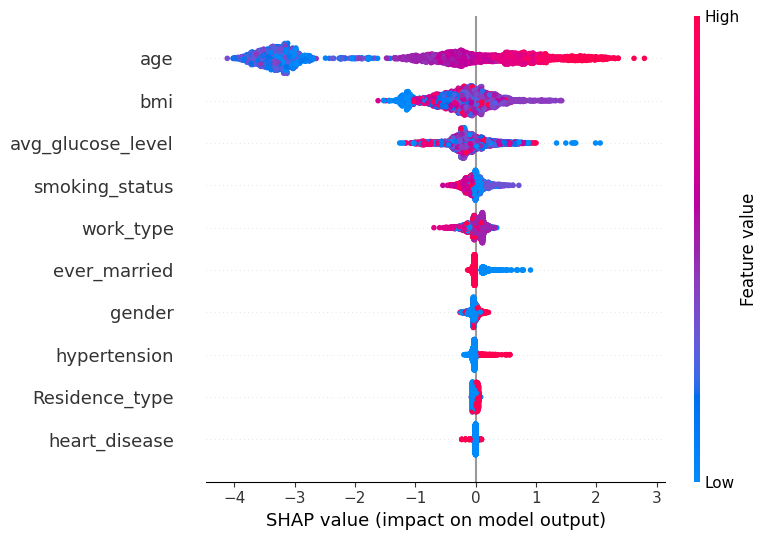

In [ ]:
explainer = shap.Explainer(xgb_model)
# Calculate SHAP values for the training set
shap_values = explainer(X_train)
# Summary plot
shap.summary_plot(shap_values, X_train)

In the above plot, "age" seems to have the highest importance since it's at the top. Features like "bmi" and "avg_glucose_level" also show a significant impact on the model's predictions. The color coding suggests which values of the feature (low or high) have more impact.

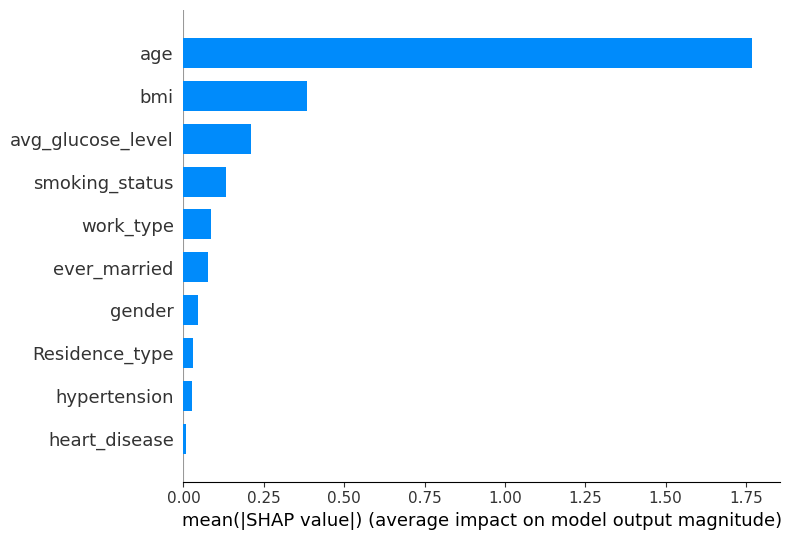

In [ ]:
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")

- The x-axis represents the mean absolute SHAP value, which quantifies the average impact of a feature on the model's output magnitude. The higher the value, the more significant the feature's impact on the model prediction.
- The y-axis lists the features in descending order of importance. The most influential feature is at the top.
- 'age' appears to have the most significant average impact on model predictions, followed by 'bmi' and 'avg_glucose_level'.

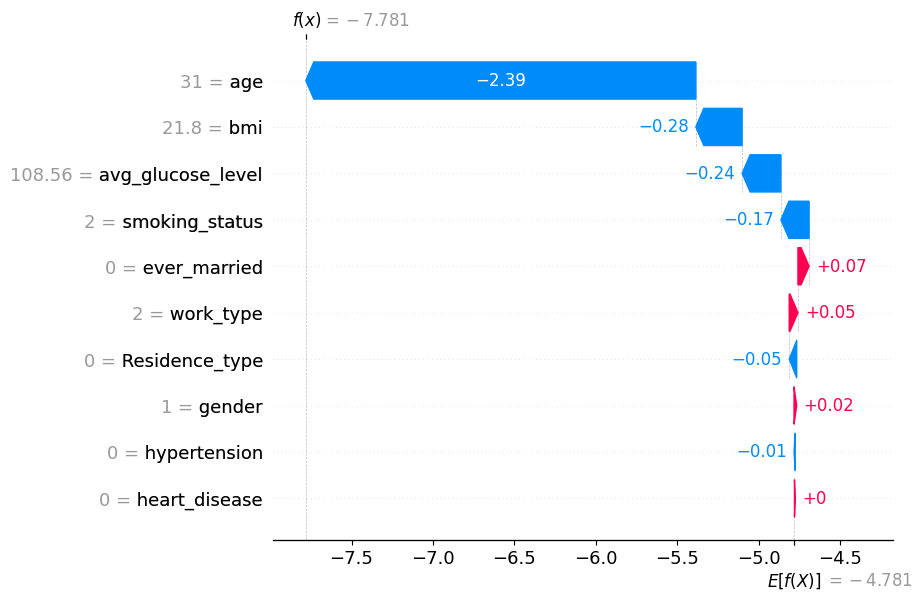

In [ ]:
# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Calculate SHAP values for a single instance
shap_values = explainer(X_train.iloc[[sample_ind]])

# Generate the SHAP waterfall plot for the selected instance
shap.plots.waterfall(shap_values[0], max_display=14)

- Each colored bar represents a feature's contribution towards the final prediction. Red bars indicate features that pushed the model's output higher (towards the positive class), and blue bars indicate features that pushed the output lower (towards the negative class).
- The features are listed from top to bottom by their impact on the particular prediction being explained.
- 'age' has the most significant positive contribution, while 'avg_glucose_level' has a negative contribution.

### AutoML

In [ ]:
# configure the memory allocation and the maximum runtime for the AutoML process

min_mem_size = 6
run_time = 222

In [ ]:
# related to memory size for execution

pct_memory = 0.5
virtual_memory = psutil.virtual_memory()
min_mem_size = int(round(int(pct_memory * virtual_memory.available) / 1073741824, 0))
print(min_mem_size)

3


In [ ]:
# Start the H2O server on a random port
port_no = random.randint(5555, 55555)

try:
    h2o.init(
        strict_version_check=False, min_mem_size_GB=min_mem_size, port=port_no
    )  # start h2o
except:
    logging.critical("h2o.init")
    h2o.download_all_logs(dirname=logs_path, filename=logfile)
    h2o.cluster().shutdown()
    sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:23224..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.25" 2024-10-15; OpenJDK Runtime Environment (build 11.0.25+9-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.25+9-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmlz7mxci
  JVM stdout: /tmp/tmpmlz7mxci/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmlz7mxci/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:23224
Connecting to H2O server at http://127.0.0.1:23224 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         04 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.6
H2O_cluster_version_age:    1 month and 1 day
H2O_cluster_name:           H2O_from_python_unknownUser_qh9oev
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    3.170 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:23224
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

In [ ]:
df_h2o = h2o.H2OFrame(df)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df_h2o.describe()

Rows:5110
Cols:11

gender              age                hypertension        heart_disease        ever_married        work_type           Residence_type      avg_glucose_level    bmi                 smoking_status      stroke
-------  ------------------  -----------------  ------------------  -------------------  ------------------  ------------------  ------------------  -------------------  ------------------  ------------------  ------------------
type     int                 real               int                 int                  int                 int                 int                 real                 real                int                 int
mins     0.0                 0.08               0.0                 0.0                  0.0                 0.0                 0.0                 55.12                10.3                0.0                 0.0
mean     0.4142857142857141  43.226614481409    0.0974559686888454  0.05401174168297456  0.6561643835616439  2.1677103718199504  0.5080234833659492  106.14767710371815   28.86203522504894   1.3769080234833617  0.0487279843444227
maxs     2.0                 82.0               1.0                 1.0                  1.0                 4.0                 1.0                 271.74               97.6                3.0                 1.0
sigma    0.4930436314174791  22.61264672311348  0.2966066742337912  0.22606298750336545  0.475033520037369   1.090293498184979   0.4999845441302678  45.28356015058193    7.6995623187875015  1.0715337628679502  0.2153198569802376
zeros    2994                0                  4612                4834                 1757                657                 2514                0                    0                   1544                4861
missing  0                   0                  0                   0                    0                   0                   0                   0                    0                   0                   0
0        1.0                 67.0               0.0                 1.0                  1.0                 2.0                 1.0                 228.69               36.6                1.0                 1.0
1        0.0                 61.0               0.0                 0.0                  1.0                 3.0                 0.0                 202.21               28.1                2.0                 1.0
2        1.0                 80.0               0.0                 1.0                  1.0                 2.0                 0.0                 105.92               32.5                2.0                 1.0
3        0.0                 49.0               0.0                 0.0                  1.0                 2.0                 1.0                 171.23               34.4                3.0                 1.0
4        0.0                 79.0               1.0                 0.0                  1.0                 3.0                 0.0                 174.12               24.0                2.0                 1.0
5        1.0                 81.0               0.0                 0.0                  1.0                 2.0                 1.0                 186.21               29.0                1.0                 1.0
6        1.0                 74.0               1.0                 1.0                  1.0                 2.0                 0.0                 70.09                27.4                2.0                 1.0
7        0.0                 69.0               0.0                 0.0                  0.0                 2.0                 1.0                 94.39                22.8                2.0                 1.0
8        0.0                 59.0               0.0                 0.0                  1.0                 2.0                 0.0                 76.15                28.1                0.0                 1.0
9        0.0                 78.0               0.0                 0.0                  1.0                 2

In [ ]:
num_rows, num_columns = df_h2o.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 5110
Number of columns: 11


### Train test split - h2o

In [ ]:
pct_rows = 0.80
df_train, df_test = df_h2o.split_frame([pct_rows])

In [ ]:
print(df_train.shape)
print(df_test.shape)

(4086, 11)
(1024, 11)


In [ ]:
X=df_h2o.columns
print(X)

['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [ ]:
#Seperate Dependent variable from Independent variable
y_target ='stroke'
X.remove(y_target)
print('Features except target variable: ',X)
print('Target Variable: ',y_target)

Features except target variable:  ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']
Target Variable:  stroke


In [ ]:
#set the AutoML
aml = H2OAutoML(max_runtime_secs=run_time, sort_metric='MAE',max_models=10 ,seed=1, exclude_algos=['DeepLearning'])

#pass the data through H20AutoML
aml.train(x=X,y=y_target,training_frame=df_train)

AutoML progress: |
05:22:47.707: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

███
05:22:57.133: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
05:22:58.841: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

█
05:23:04.384: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
05:23:10.721: _response param, We have

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20241203_52247


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    20                 20                          22215                  8            8            8             47            116           83.75

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03006308652692872
RMSE: 0.1733871002321935
MAE: 0.07082450623429204
RMSLE: 0.11734430537786814
Mean Residual Deviance: 0.03006308652692872

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.04366638688993151
RMSE: 0.20896503748218626
MAE: 0.08552022695663526
RMSLE: 0.14703717315616727
Mean Residual Deviance: 0.04366638688993151

Cross-Validation Metrics Summary: 
                        mean       sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  ---------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan        0           nan           nan           nan           nan           nan
loglikelihood           nan        0           nan           nan           nan           nan           nan
mae                     0.0863913  0.00450954  0.0842609     0.0903925     0.0823925     0.0920673     0.0828434
mean_residual_deviance  0.0446928  0.0020384   0.0445211     0.0459562     0.043231      0.0474065     0.0423489
mse                     0.0446928  0.0020384   0.0445211     0.0459562     0.043231      0.0474065     0.0423489
r2                      0.0355105  0.0381226   0.0427335     0.013023      0.0715493     -0.0181252    0.0683721
residual_deviance       0.0446928  0.0020384   0.0445211     0.0459562     0.043231      0.0474065     0.0423489
rmse                    0.211363   0.0048131   0.211         0.214374      0.207921      0.21773       0.205789
rmsle                   0.1497     0.00474801  0.149124      0.152612      0.145729      0.156186      0.144849

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------
    2024-12-03 05:23:24  3.435 sec   0                  0.215246         0.0926618       0.0463309
    2024-12-03 05:23:25  3.570 sec   5                  0.198734         0.0849073       0.0394953
    2024-12-03 05:23:25  3.681 sec   10                 0.187556         0.0790091       0.0351774
    2024-12-03 05:23:25  3.808 sec   15                 0.179566         0.0746188       0.0322438
    2024-12-03 05:23:25  3.909 sec   20                 0.173387         0.0708245       0.0300631

Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
age                120.036                1                    0.333657
avg_glucose_level  94.6214                0.788275             0.263014
bmi                64.5749                0.537963             0.179495
smoking_status     23.1861                0.193159             0.0644491
Residence_type     13.5269                0.11269              0.0375998
hypertension       11.6143                0.0967565            0.0322835
work_type          11.1156                0.0926019            0.0308973
gender             8.59076                0.0715682            0.0238793
heart_disease      7.17721                0.0597922            0.0199501
ever_married       5.3152                 0.0442801            0.0147744

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.to

### Print the best model

In [ ]:
# Get the AutoML leaderboard
leaderboard = aml.leaderboard

# Print the leaderboard
print(leaderboard)

model_id                                                      mae      rmse        mse     rmsle    mean_residual_deviance
GBM_3_AutoML_1_20241203_52247                           0.0855202  0.208965  0.0436664  0.147037                 0.0436664
GBM_2_AutoML_1_20241203_52247                           0.0857469  0.209117  0.0437299  0.146926                 0.0437299
GBM_1_AutoML_1_20241203_52247                           0.0858528  0.20642   0.0426091  0.144221                 0.0426091
StackedEnsemble_AllModels_1_AutoML_1_20241203_52247     0.0858971  0.20669   0.0427208  0.144318                 0.0427208
GBM_4_AutoML_1_20241203_52247                           0.086713   0.210594  0.0443499  0.148248                 0.0443499
StackedEnsemble_BestOfFamily_1_AutoML_1_20241203_52247  0.0871486  0.207492  0.043053   0.14486                  0.043053
DRF_1_AutoML_1_20241203_52247                           0.0899856  0.218412  0.0477037  0.156331                 0.0477037
XRT_1_AutoML_1_20

model_id                             mae      rmse        mse     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
-----------------------------  ---------  --------  ---------  --------  ------------------------  ------------------  -------------------------  ------
GBM_3_AutoML_1_20241203_52247  0.0855202  0.208965  0.0436664  0.147037                 0.0436664                 483                   0.012706  GBM
GBM_2_AutoML_1_20241203_52247  0.0857469  0.209117  0.0437299  0.146926                 0.0437299                 341                   0.011002  GBM
GBM_1_AutoML_1_20241203_52247  0.0858528  0.20642   0.0426091  0.144221                 0.0426091                 911                   0.010948  GBM
GLM_1_AutoML_1_20241203_52247  0.0920783  0.208084  0.0432988  0.14555                  0.0432988                  58                   0.001199  GLM
[4 rows x 9 columns]

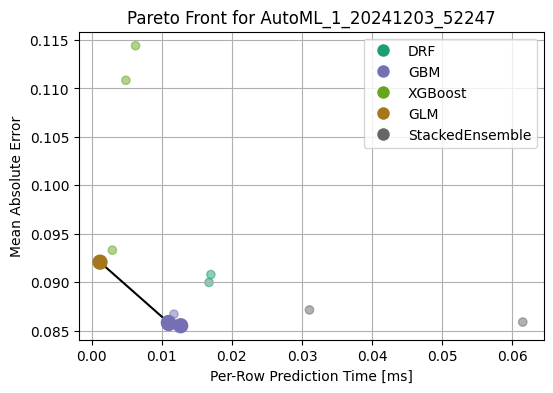

In [ ]:
pf = aml.pareto_front()
fig = pf.figure()

# Adjust the size of the figure
fig.set_size_inches(6, 4)

# Display the plot
pf

In [ ]:
best_model = aml.leader
print(best_model)

Model Details
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_3_AutoML_1_20241203_52247


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    20                 20                          22215                  8            8            8             47            116           83.75

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03006308652692872
RMSE: 0.1733871002321935
MAE: 0.07082450623429204
RMSLE: 0.11734430537786814
Mean Residual Deviance: 0.03006308652692872

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 0.04366638688993151
RMSE: 0.20896503748218626
MAE: 0.08552022695663526
RMSLE: 0.14703717315616727
Mean Residual Deviance: 0.043666

In [ ]:
print("Best Model ID:", best_model.model_id)
print("Best Model MSE:", best_model.mse())

Best Model ID: GBM_3_AutoML_1_20241203_52247
Best Model MSE: 0.03006308652692872


In [ ]:
best_model.algo

'gbm'

### Train the best model

In [ ]:
best_model.train(x=X,y=y_target,training_frame=df_train)

gbm Model Build progress: |

/usr/local/lib/python3.10/dist-packages/h2o/estimators/estimator_base.py:192: RuntimeWarning: We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1733203349266_13


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    50                 50                          15363                  5            5            5             10            30            19.74

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.03267542856986771
RMSE: 0.18076346027299794
MAE: 0.07293483162879287
RMSLE: 0.12411408663045341
Mean Residual Deviance: 0.03267542856986771

Scoring History: 
     timestamp            duration    number_of_trees    training_rmse        training_mae         training_deviance
---  -------------------  ----------  -----------------  -------------------  -------------------  --------------------
     2024-12-03 05:23:47  0.026 sec   0.0                0.21524617678175725  0.09266183323833965  0.0463309166191635
     2024-12-03 05:23:47  0.048 sec   1.0                0.2126432518583754   0.09148945042164199  0.04521715256090448
     2024-12-03 05:23:47  0.065 sec   2.0                0.21025897274779798  0.0903466926797371   0.04420883562095926
     2024-12-03 05:23:47  0.075 sec   3.0                0.20831567703690088  0.08934118846049363  0.04339542129934239
     2024-12-03 05:23:47  0.090 sec   4.0                0.20652699938323887  0.08838220303162488  0.04265340147424435
     2024-12-03 05:23:47  0.103 sec   5.0                0.20496995265861775  0.08750300125706242  0.042012681492876
     2024-12-03 05:23:47  0.120 sec   6.0                0.20341399238756136  0.08662466194920107  0.041377252299046874
     2024-12-03 05:23:47  0.135 sec   7.0                0.20193795524960795  0.08577150648630284  0.04077893777039267
     2024-12-03 05:23:47  0.147 sec   8.0                0.20065748534540828  0.08499572032262999  0.04026342642514274
     2024-12-03 05:23:47  0.160 sec   9.0                0.19971826737502735  0.08438057785856479  0.03988738632328292
---  ---                  ---         ---                ---                  ---                  ---
     2024-12-03 05:23:47  0.633 sec   41.0               0.18246060413447207  0.07378968144860616  0.03329187206111652
     2024-12-03 05:23:47  0.645 sec   42.0               0.18236916975729164  0.07373451102383807  0.03325851407796386
     2024-12-03 05:23:47  0.658 sec   43.0               0.1819287168035164   0.07350798938298136  0.03309805799777407
     2024-12-03 05:23:47  0.678 sec   44.0               0.18179834350593863  0.07344943006046802  0.03305063770150326
     2024-12-03 05:23:47  0.690 sec   45.0               0.18169545444530966  0.07340077090413381  0.033013238166087595
     2024-12-03 05:23:47  0.707 sec   46.0               0.1815223133496023   0.07332353511637746  0.032950350243791206
     2024-12-03 05:23:47  0.722 sec   47.0               0.1814136997429358   0.07327230308868045  0.03291093045442007
     2024-12-03 05:23:47  0.736 sec   48.0               0.18133517525230028  0.07322769188152675  0.03288244578378245
     2024-12-03 05:23:47  0.751 sec   49.0               0.18097228822483266  0.07303901632956061  0.03275096910533191
     2024-12-03 05:23:47  0.765 sec   50.0               0.18076346027299794  0.07293483162879287  0.03267542856986771
[51 rows x 7 columns]


Variable Importances: 
variable           relative_importance    scaled_importance    percentage
-----------------  ---------------------  -------------------  ------------
age                106.994                1                    0.364342
avg_glucose_level  80.8269                0.755432             0.275235
bmi                50.74                  0.474231             0.172782
smoking_status     17.8001         

In [ ]:
predictions = best_model.predict(df_test)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
target_column = "stroke"

# Add the actual labels to the predictions DataFrame
predictions[target_column] = df_test[target_column]

# Evaluate model performance
perf = best_model.model_performance(df_test)

In [ ]:
print(perf)

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.043213876949163114
RMSE: 0.20787947697924178
MAE: 0.0861220520775521
RMSLE: 0.1466720069088782
Mean Residual Deviance: 0.043213876949163114


# Leaderboard

> Leaderboard shows models with their metrics. When provided with H2OAutoML object, the leaderboard shows 5-fold cross-validated metrics by default (depending on the H2OAutoML settings), otherwise it shows metrics computed on the frame. At most 20 models are shown by default.

model_id                                                    rmse        mse        mae     rmsle    mean_residual_deviance    training_time_ms    predict_time_per_row_ms  algo
------------------------------------------------------  --------  ---------  ---------  --------  ------------------------  ------------------  -------------------------  ---------------
StackedEnsemble_AllModels_1_AutoML_1_20241203_52247     0.202008  0.0408074  0.0856858  0.140538                 0.0408074                1438                   0.055332  StackedEnsemble
GBM_1_AutoML_1_20241203_52247                           0.202446  0.0409843  0.085515   0.141072                 0.0409843                 911                   0.010459  GBM
StackedEnsemble_BestOfFamily_1_AutoML_1_20241203_52247  0.202528  0.0410174  0.0869589  0.140795                 0.0410174                1380                   0.049218  StackedEnsemble
GLM_1_AutoML_1_20241203_52247                           0.203301  0.0413313  0.0908739  0.141318                 0.0413313                  58                   0.001257  GLM
GBM_3_AutoML_1_20241203_52247                           0.203512  0.0414172  0.0864634  0.142936                 0.0414172                 483                   0.010417  GBM
GBM_2_AutoML_1_20241203_52247                           0.204012  0.041621   0.0855275  0.142759                 0.041621                  341                   0.009709  GBM
GBM_4_AutoML_1_20241203_52247                           0.206761  0.0427501  0.0880488  0.145334                 0.0427501                 362                   0.010754  GBM
XRT_1_AutoML_1_20241203_52247                           0.206826  0.0427771  0.0908158  0.145584                 0.0427771                 977                   0.022336  DRF
DRF_1_AutoML_1_20241203_52247                           0.212771  0.0452717  0.0889338  0.15157                  0.0452717                 794                   0.034502  DRF
XGBoost_3_AutoML_1_20241203_52247                       0.216945  0.047065   0.0949676  0.155731                 0.047065                  537                   0.003458  XGBoost
XGBoost_1_AutoML_1_20241203_52247                       0.227561  0.0517841  0.116217   0.168521                 0.0517841                 992                   0.006812  XGBoost
XGBoost_2_AutoML_1_20241203_52247                       0.228006  0.0519869  0.109678   0.168049                 0.0519869                 714                   0.005429  XGBoost
[12 rows x 9 columns]

# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

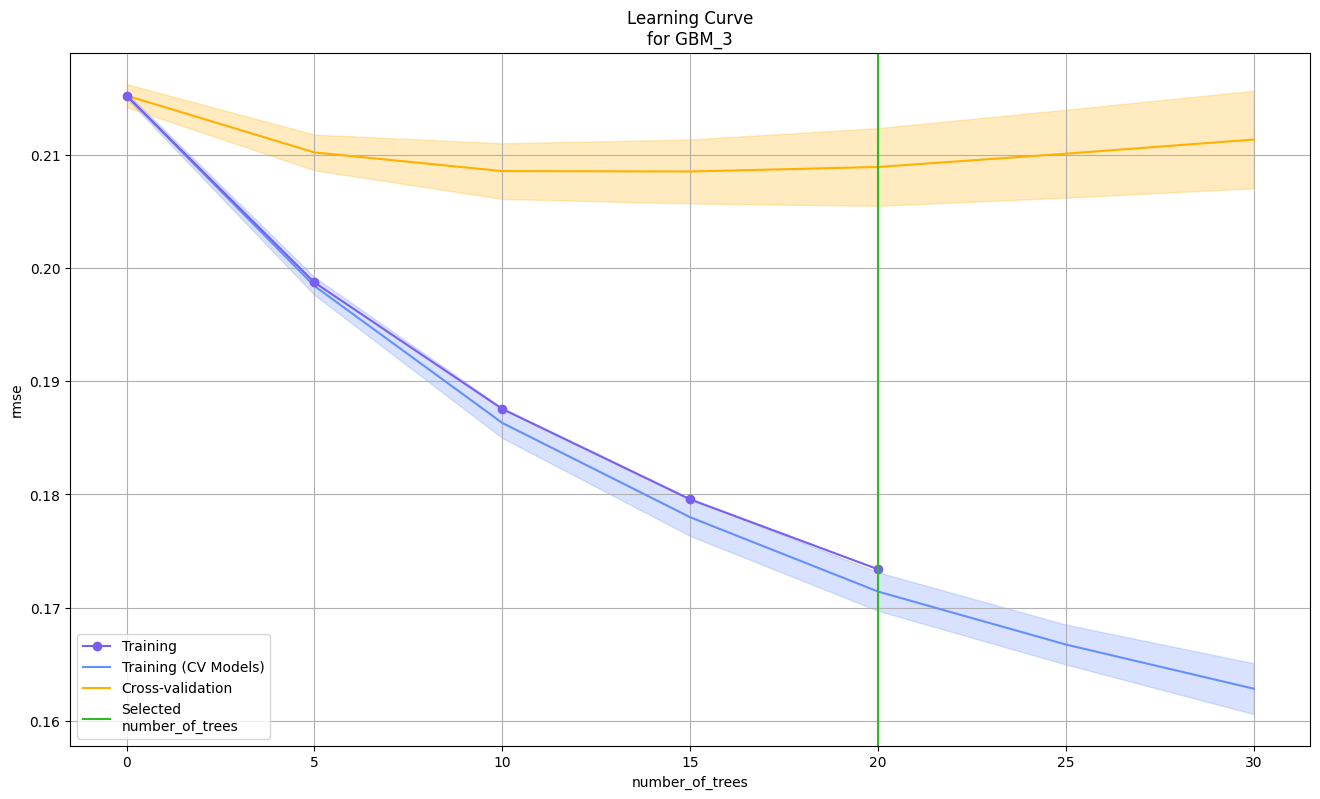

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# Variable Importance Heatmap

> Variable importance heatmap shows variable importance across multiple models. Some models in H2O return variable importance for one-hot (binary indicator) encoded versions of categorical columns (e.g. Deep Learning, XGBoost). In order for the variable importance of categorical columns to be compared across all model types we compute a summarization of the the variable importance across all one-hot encoded features and return a single variable importance for the original categorical feature. By default, the models and variables are ordered by their similarity.

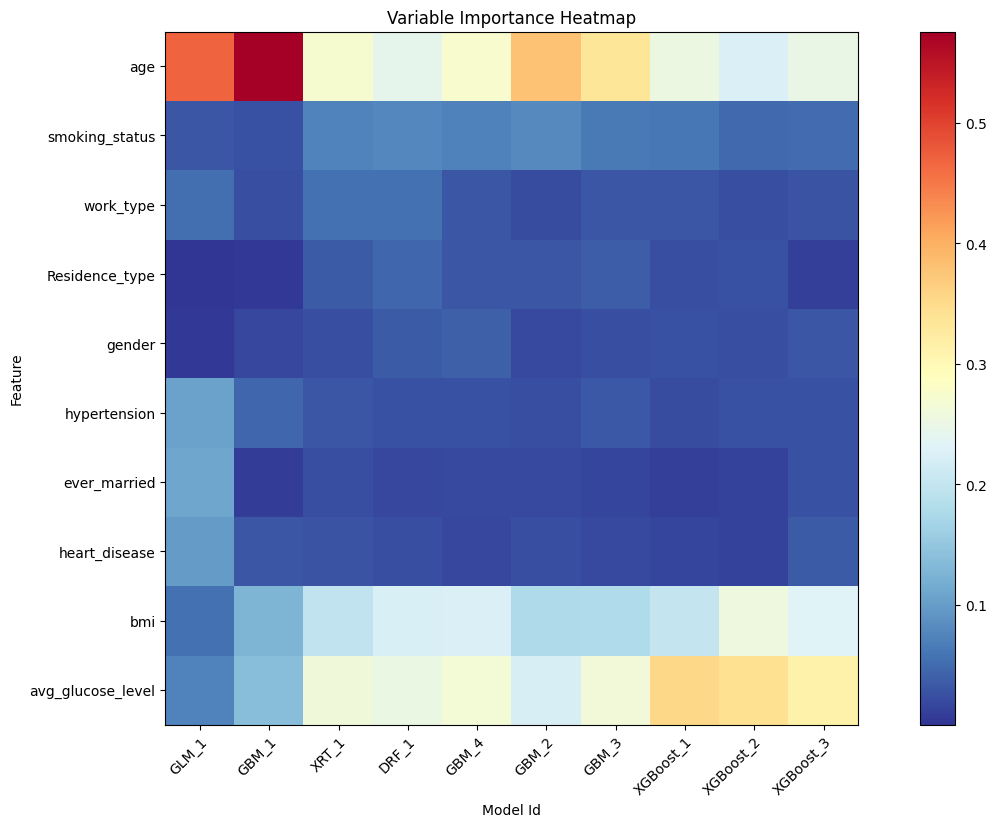

# Model Correlation

> This plot shows the correlation between the predictions of the models. For classification, frequency of identical predictions is used. By default, models are ordered by their similarity (as computed by hierarchical clustering). Interpretable models, such as GAM, GLM, and RuleFit are highlighted using red colored text.

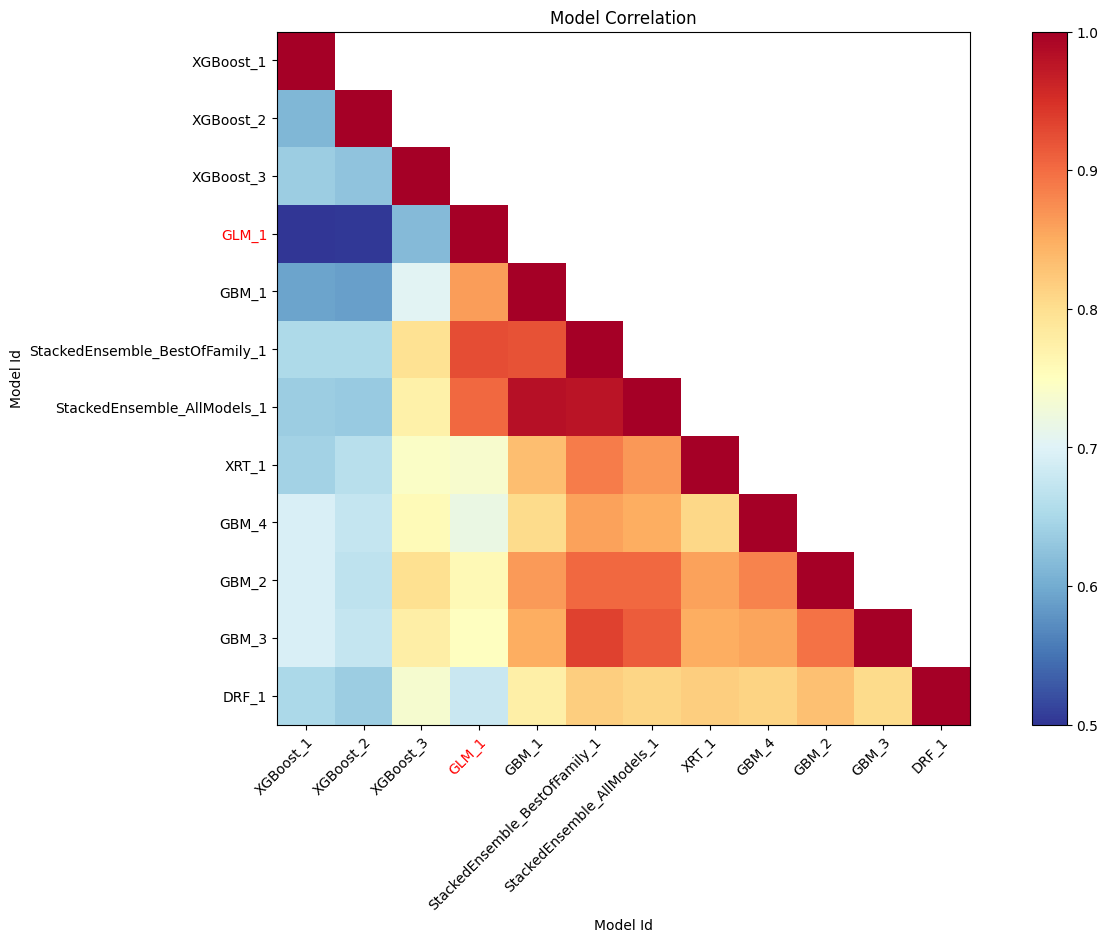

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

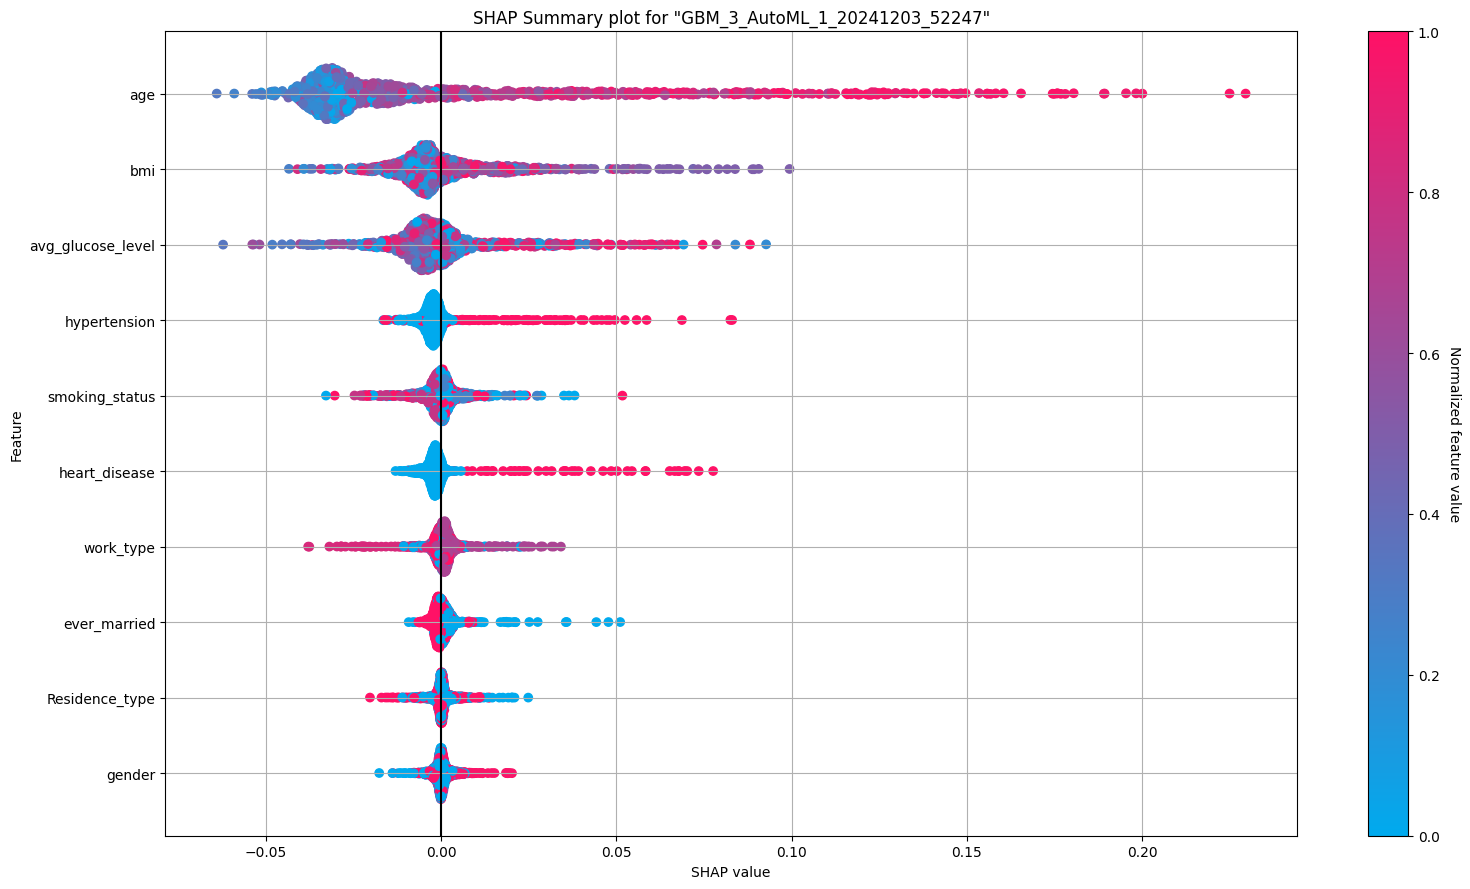

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

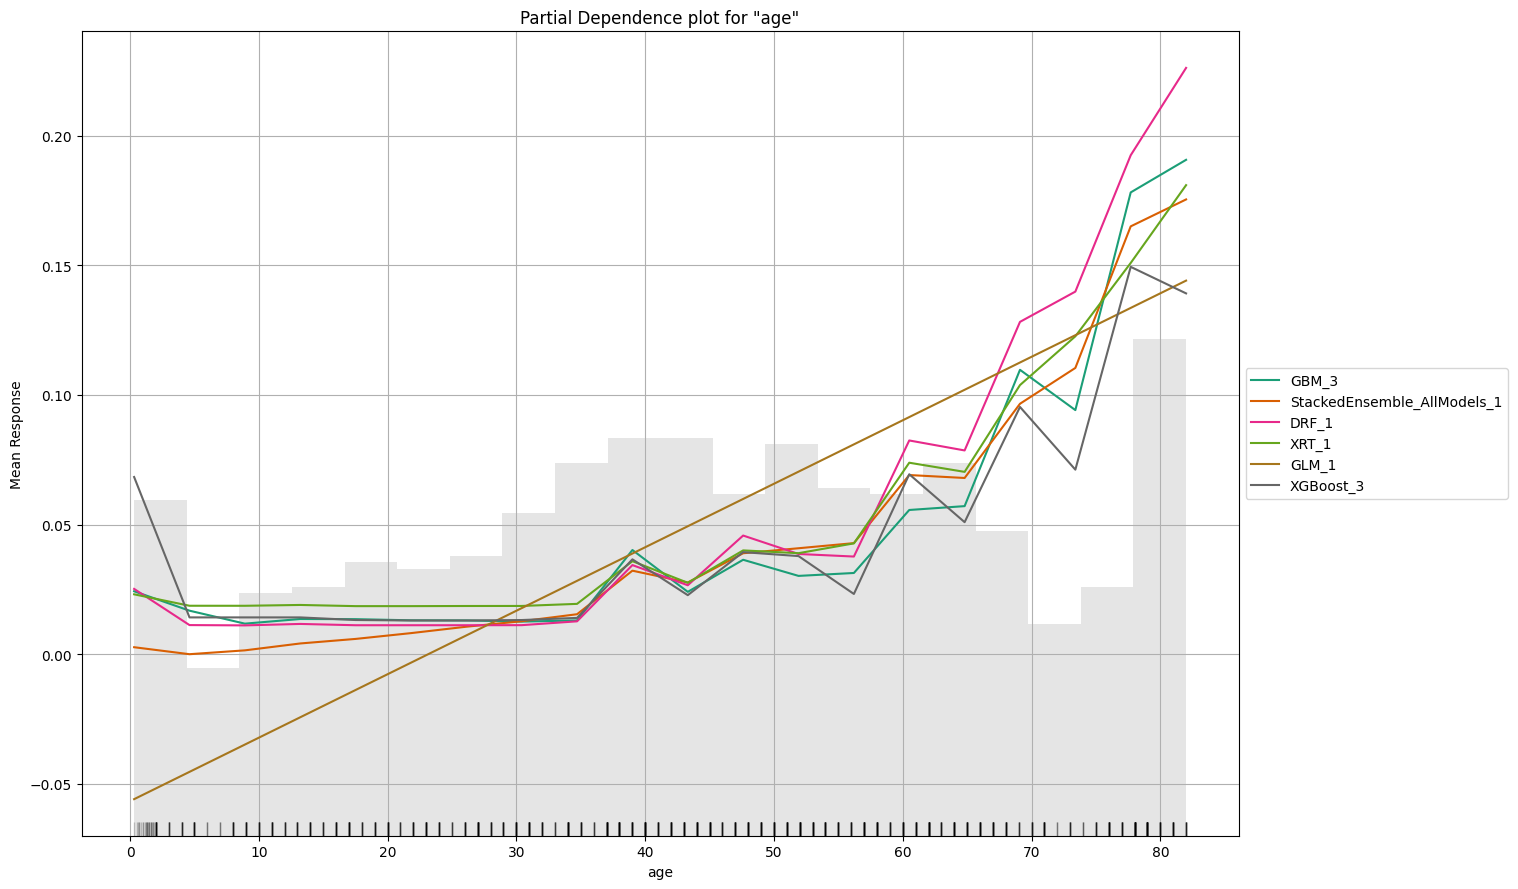

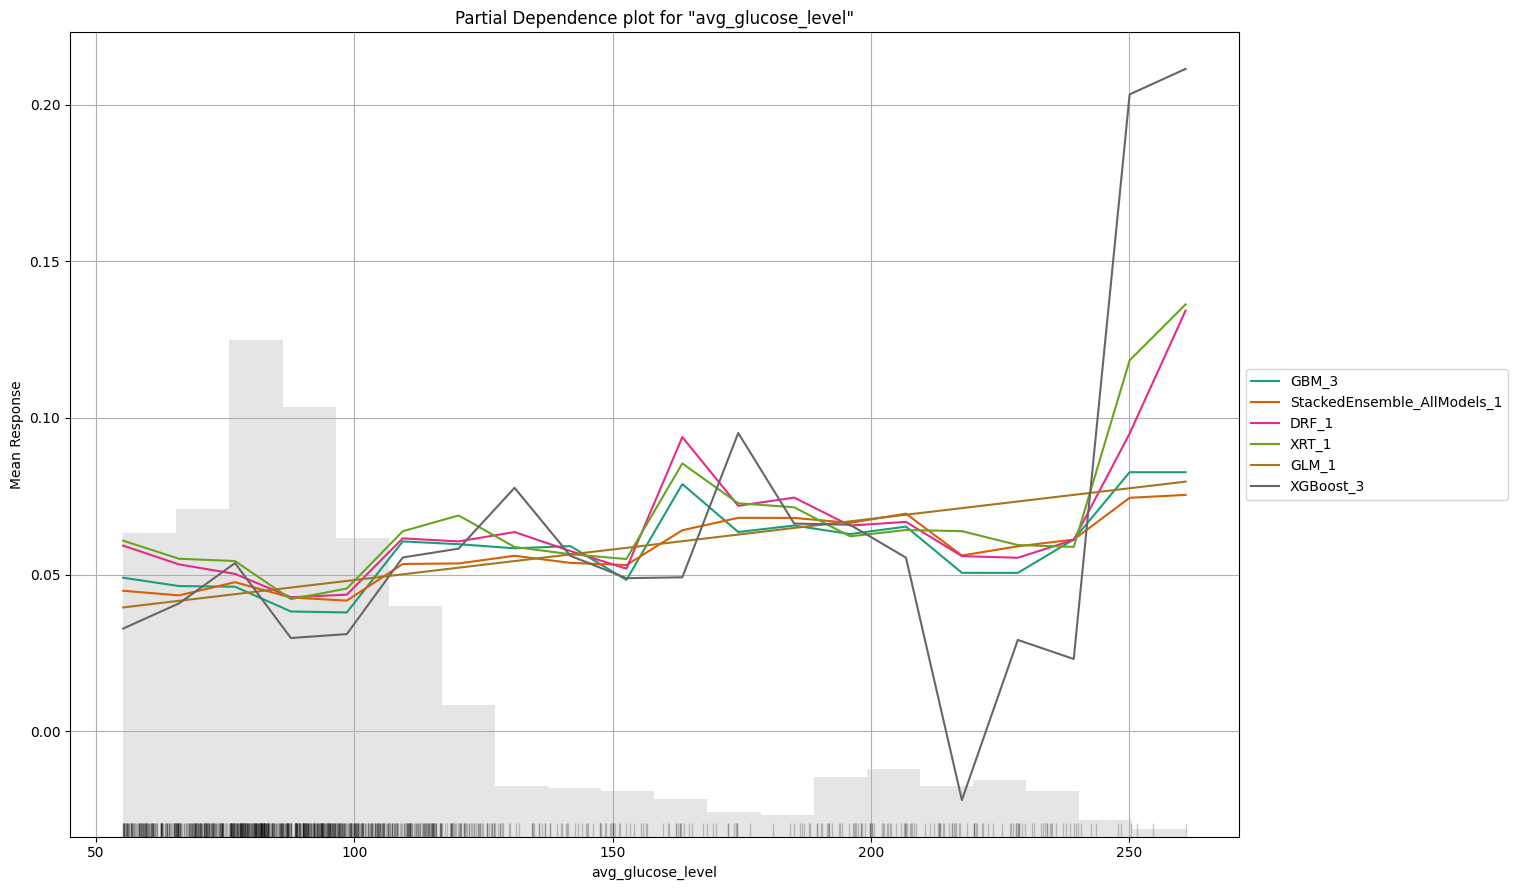

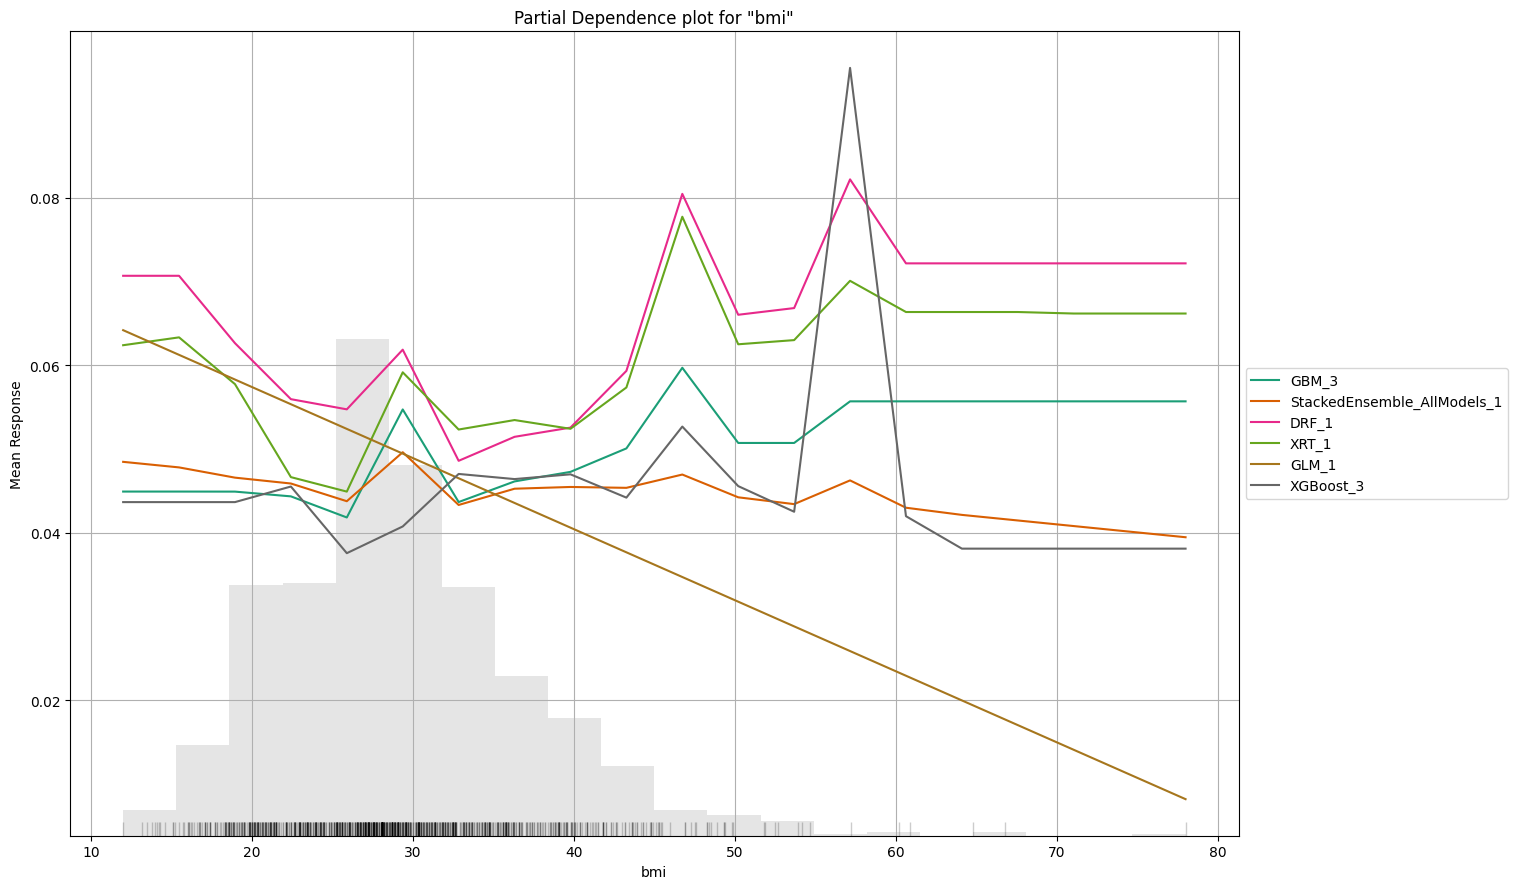

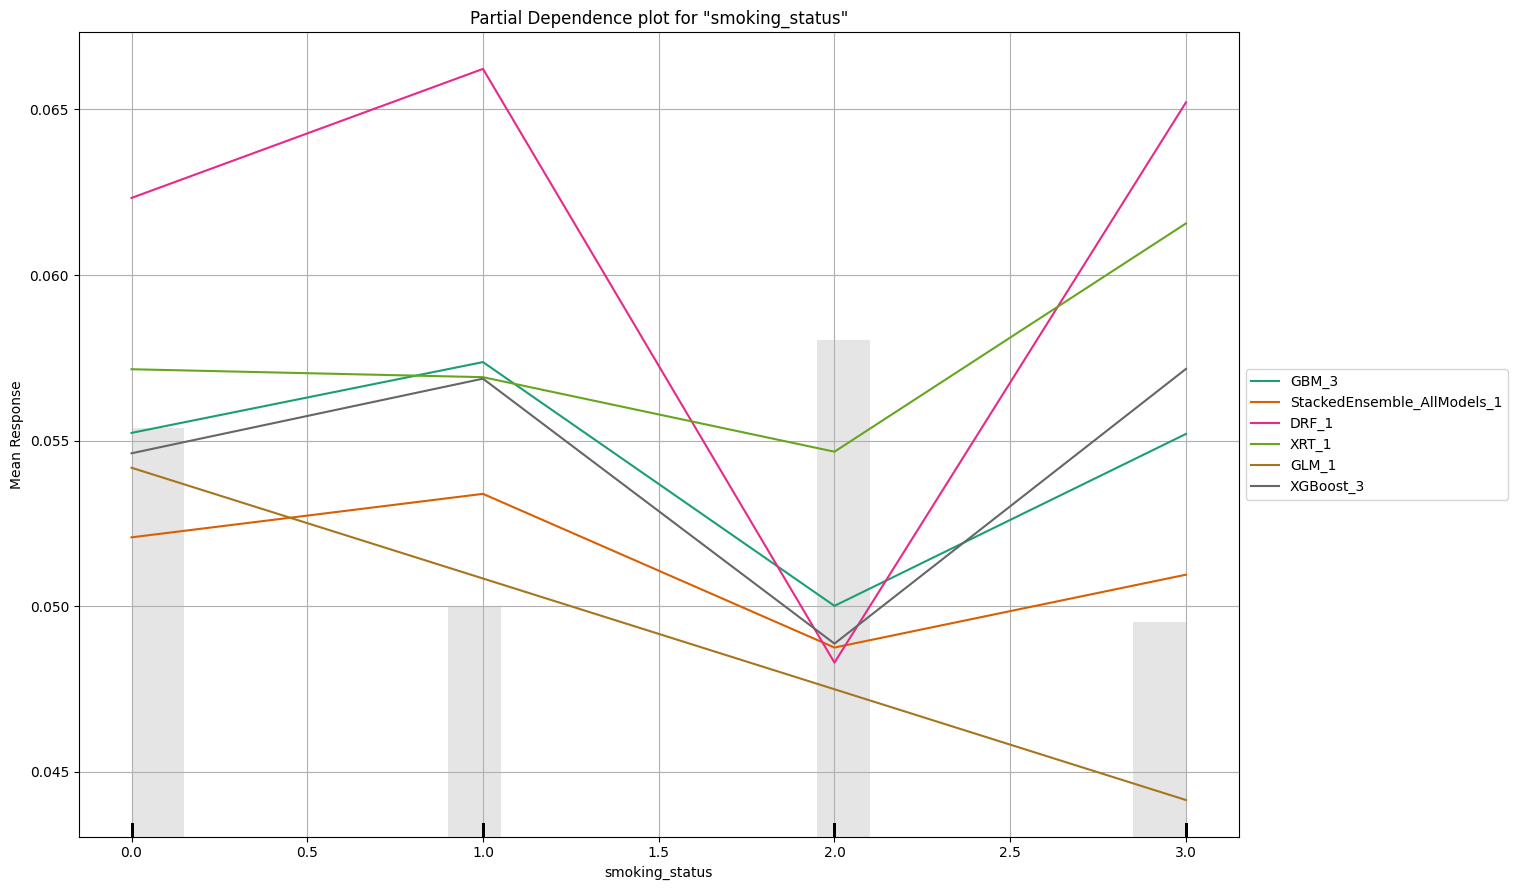

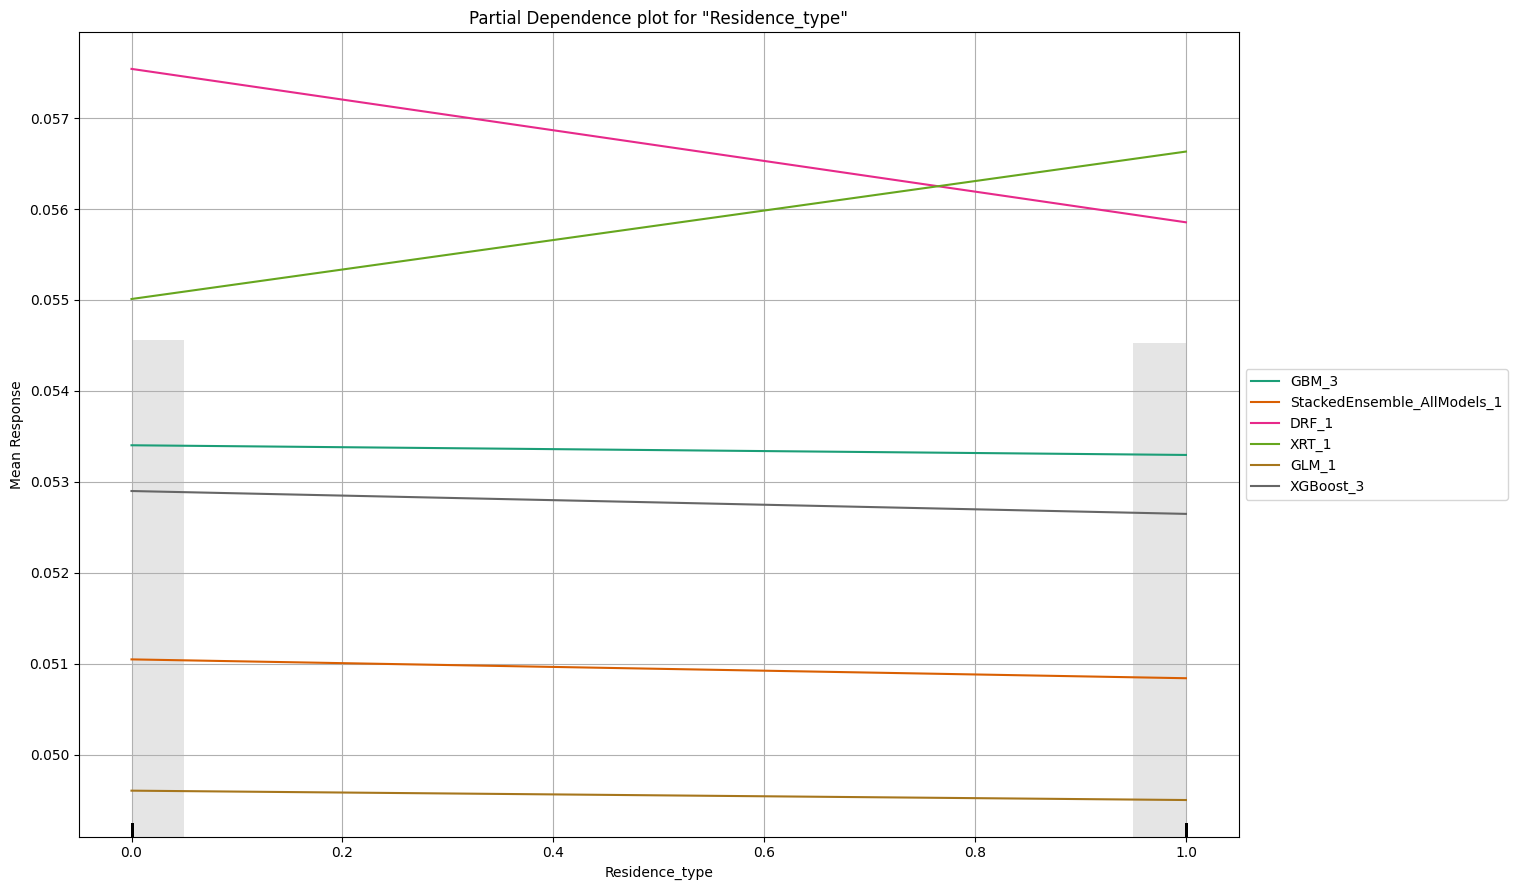

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

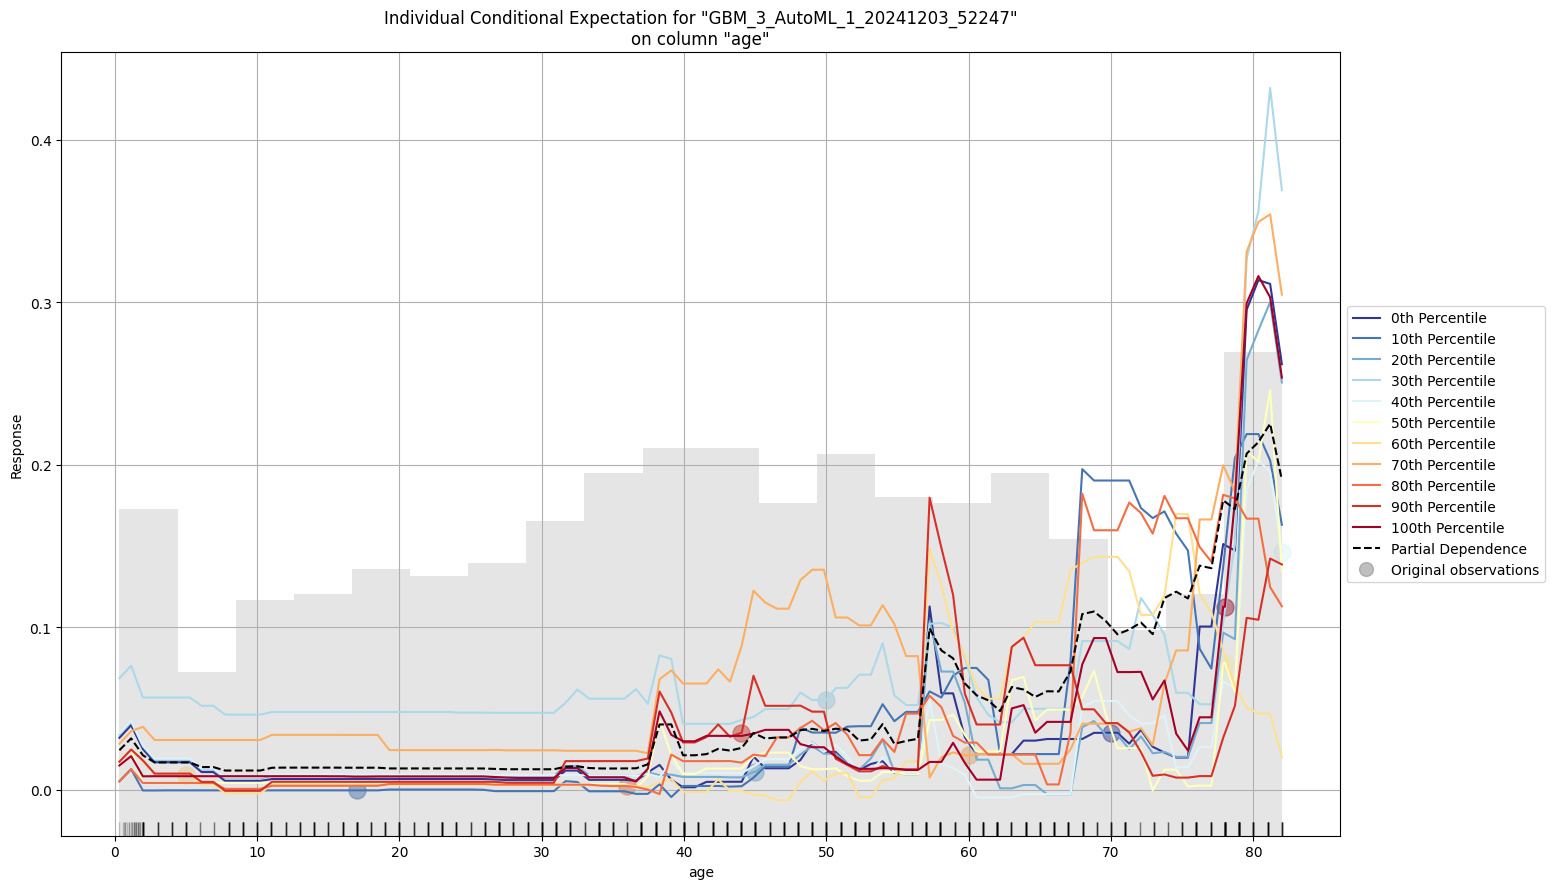

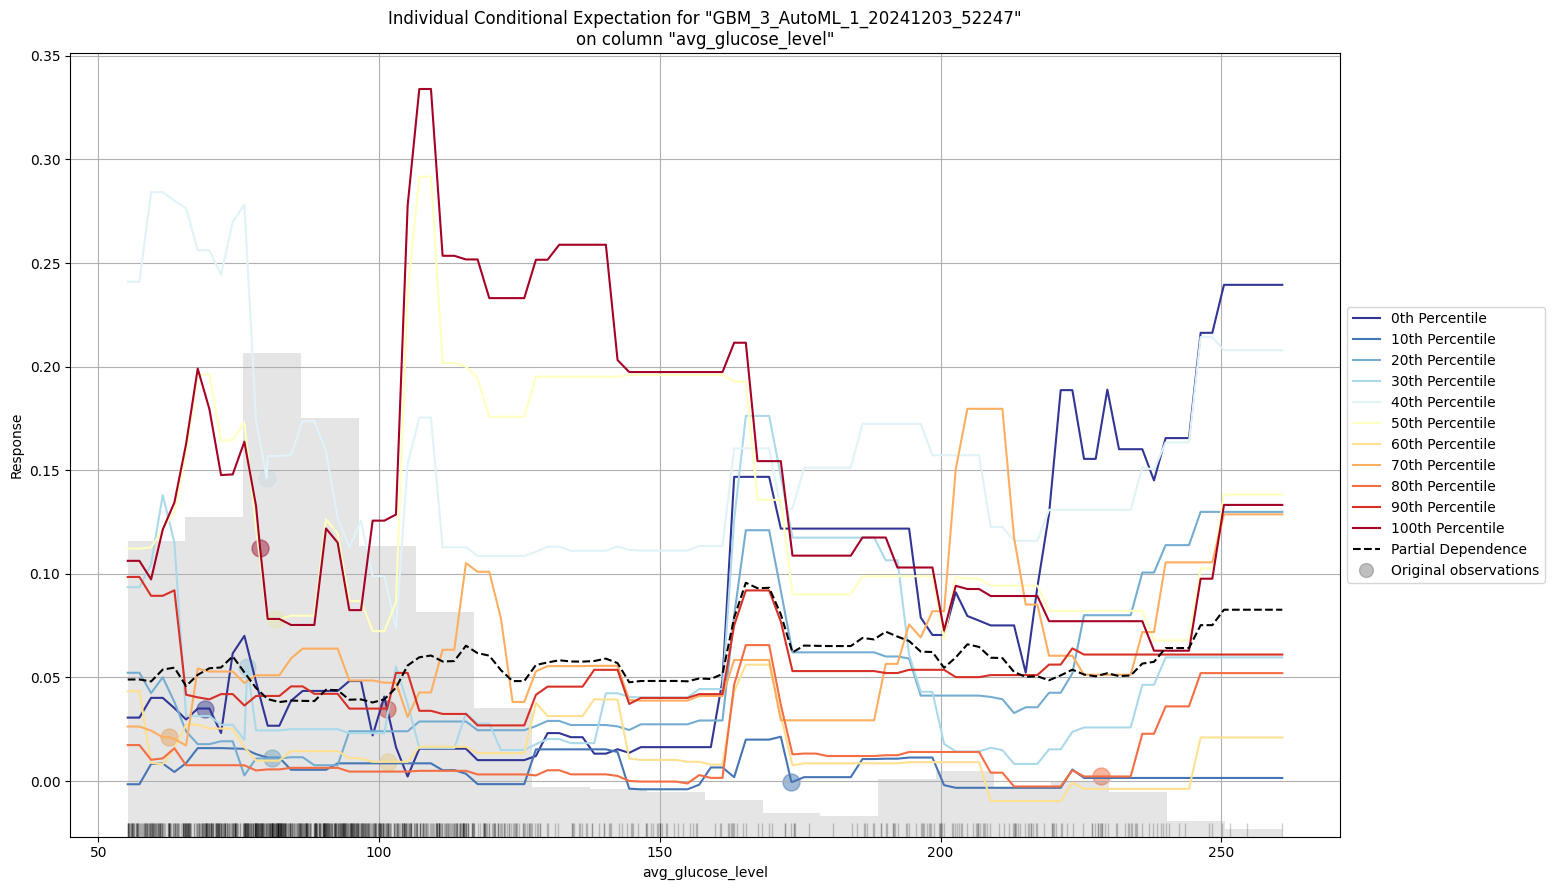

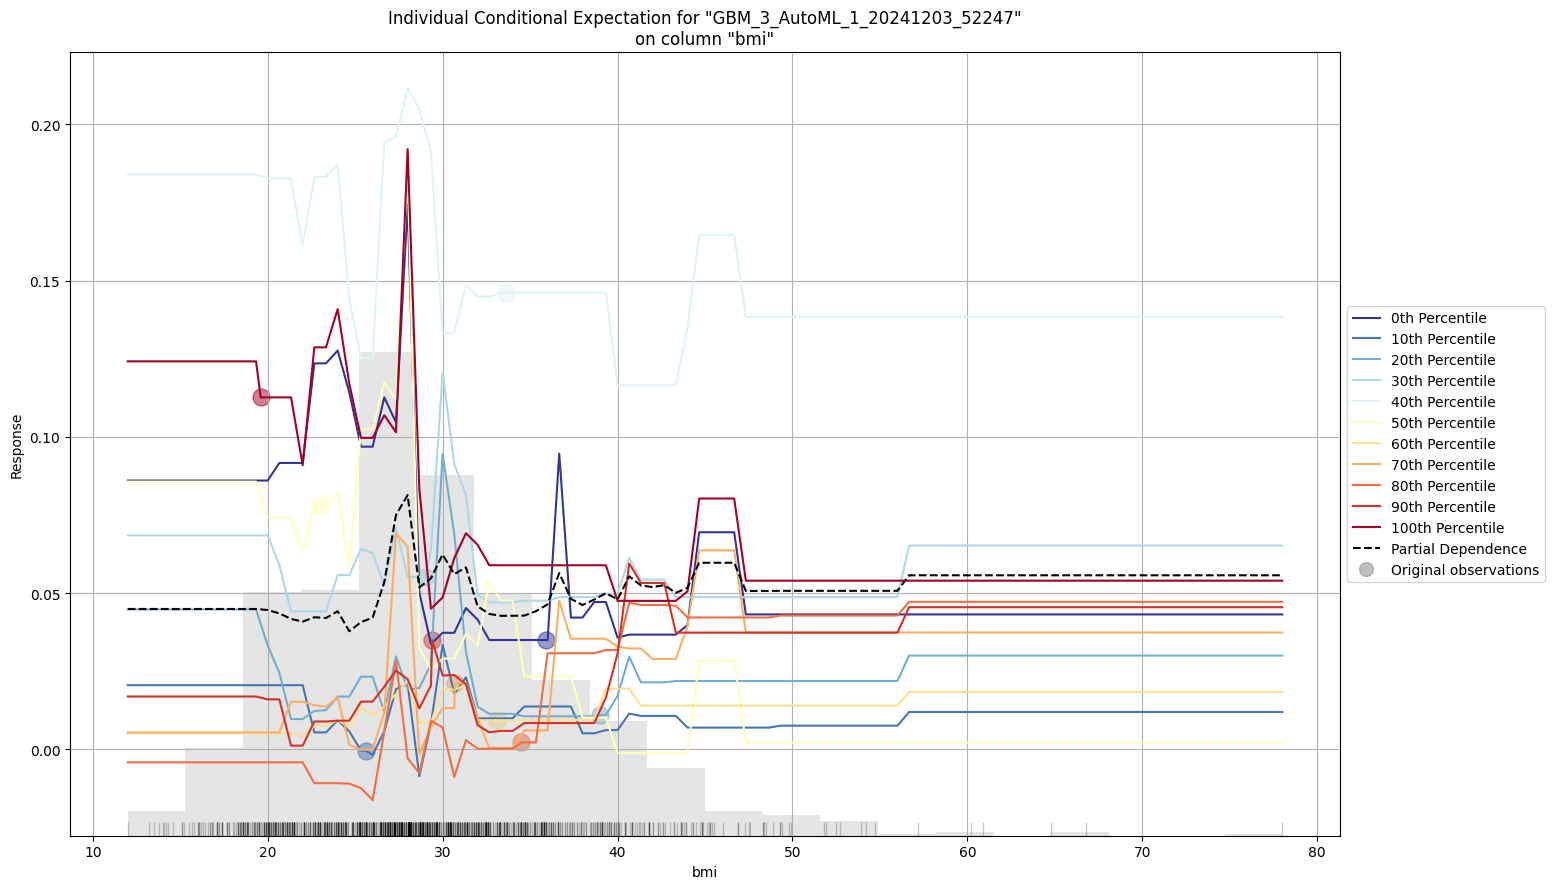

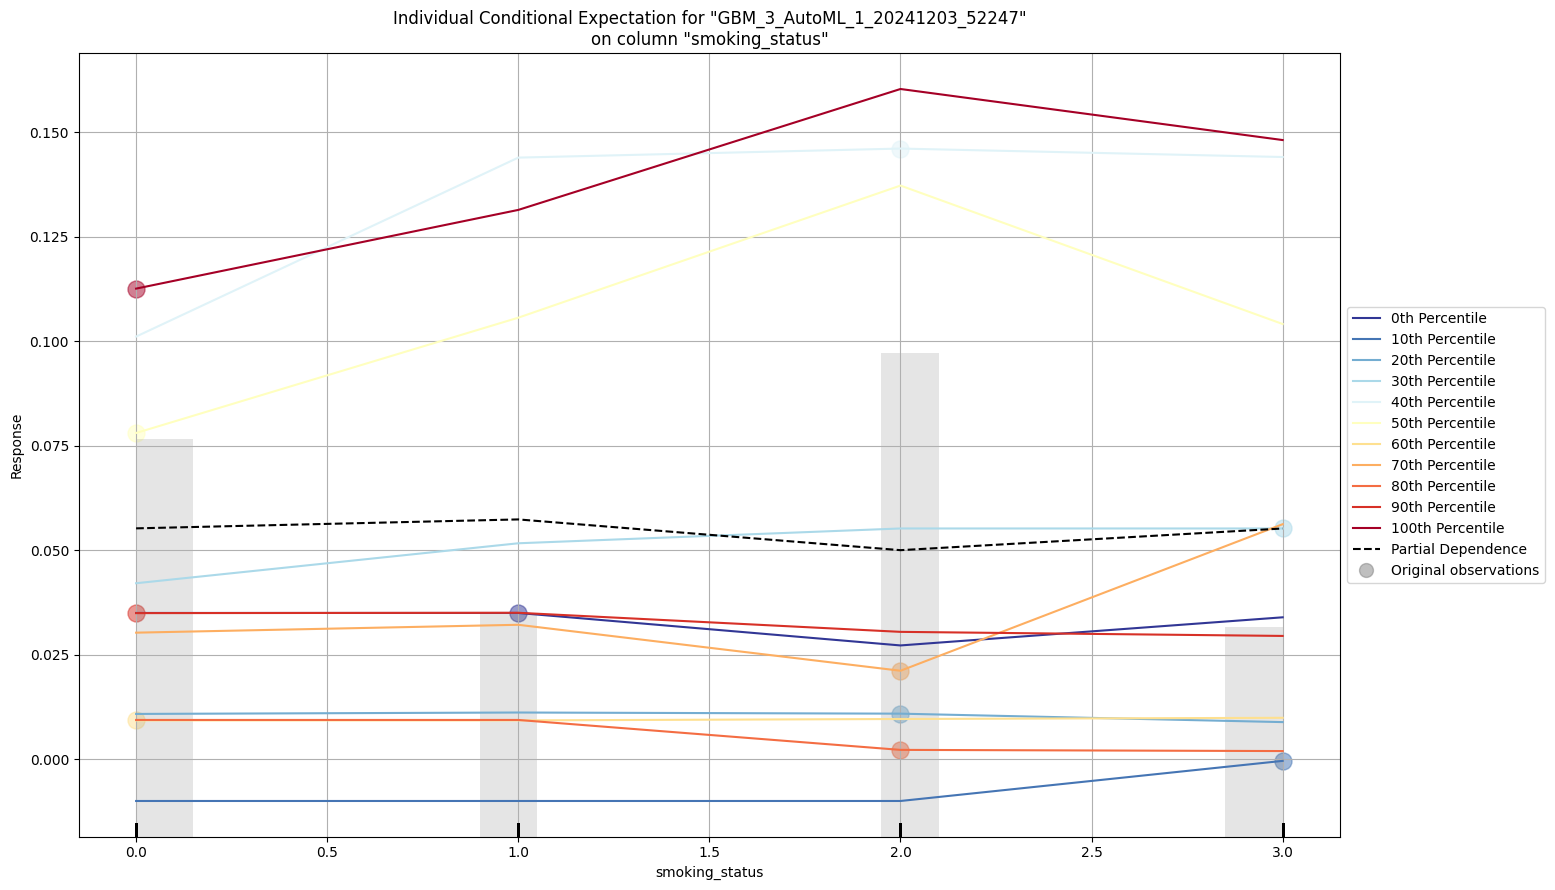

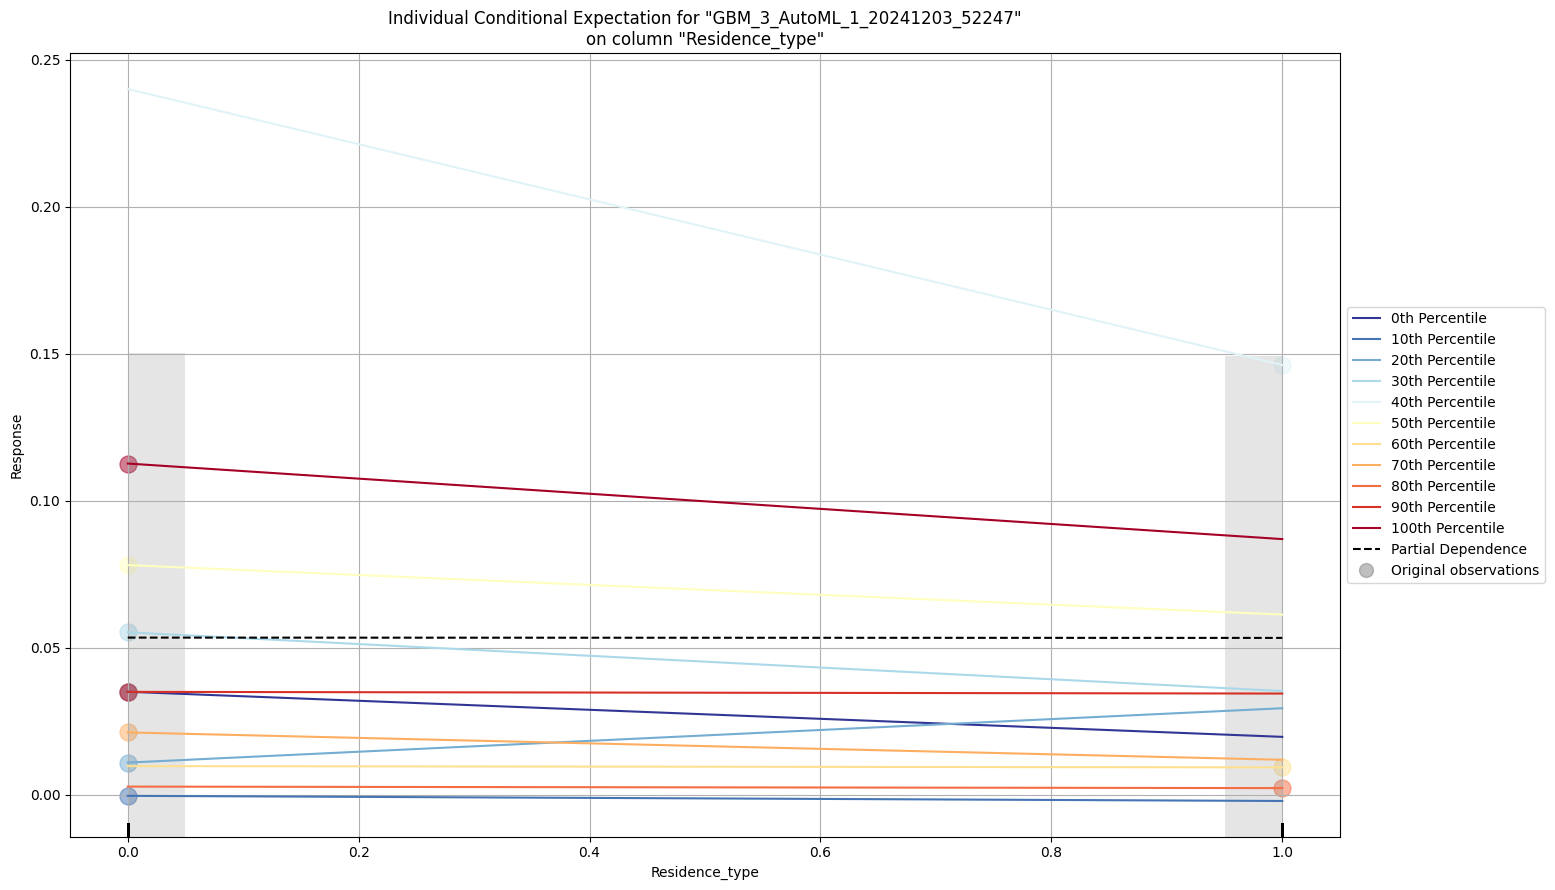

In [ ]:
explain_model = aml.explain(frame = df_test)

## CONCLUSION

- Causality serves as the backbone of informed decision-making in machine learning, providing clarity on the underlying mechanisms driving data. By integrating causal analysis into the machine learning pipeline, we move beyond mere correlation to understanding the true drivers of change. Techniques such as **Recursive Feature Elimination (RFE)** help prioritize critical variables like `avg_glucose_level`, ensuring models focus on the most impactful predictors. Complementing this, robust data preparation methods—such as **outlier removal using the Interquartile Range (IQR)** and **median imputation for handling missing values**—lay a strong foundation for reliable analysis.

- Visualization also plays a pivotal role in causal reasoning. Using **Directed Graphs (DiGraphs)**, we can map causal relationships to identify pathways of influence. For example, insights from **correlation graphs** can reveal dependencies, such as the correlation between `age` and `ever_married`. Recognizing this relationship allows us to simplify our models by dropping redundant variables, enhancing both interpretability and efficiency. By combining these techniques with causal frameworks, we ensure machine learning models are not only predictive but also grounded in actionable insights.

- Linear Regression: The features 'age', 'ever_married', and 'bmi' appear to be the most important, with 'age' having the largest impact. The SHAP values indicate varying levels of impact across the values of each feature.

- XGBoost: Similar to the linear regression model, 'age', 'bmi', and 'avg_glucose_level' are significant, but there's a noticeable difference in the distribution of SHAP values. 'Age' and 'bmi' have a broad spread of SHAP values, suggesting a non-linear and complex relationship with the outcome.

- AutoML: The AutoML plot suggests a more even distribution of feature importance across many features, with 'age' still being prominent but less dominant. This model may be picking up more on the nuanced interactions between features.

Overall, 'age' is consistently important across all three models, suggesting it is a strong predictor of the outcome. The XGBoost and AutoML models, which likely capture non-linear relationships and interactions between features, show a broader spread of influence across additional features compared to the linear regression model.

In summary, the careful integration of causal principles, feature selection, data preparation, and interpretive tools like graphs enables us to build models that are robust, transparent, and equipped to guide impactful interventions. These steps bridge the gap between data and decision-making, paving the way for meaningful applications across diverse domains.

### REFERENCES

- Introduction to Casuality in Machine Learning - https://towardsdatascience.com/introduction-to-causality-in-machine-learning-4cee9467f06f

- Geeks for Geeks: https://www.geeksforgeeks.org/understanding-logistic-regression/

- XGBoost Documentation: https://xgboost.readthedocs.io/en/stable/

- DoWhy Library: https://microsoft.github.io/dowhy/

- H2O Documentation: : https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html?_ga=2.129161676.1179250264.1708398551-1770022984.1708209167

- Towards Data Science(SHAP Analysis): https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137

- SHAP Documentation: https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

### LICENSE

MIT License

Copyright (c) 2024 pranitee23

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
